In [ ]:
## ÏãúÍ∞ÅÌôî (6Í∞ú Î≥ÄÏàò Í≤∞Í≥º)

# X, hidden_states Í∏∏Ïù¥Ïóê ÎßûÎäî Ïù∏Îç±Ïä§Îßå ÏãúÍ∞ÅÌôî
valid_idx = df[variables_new].dropna().index
dates_valid = df.loc[valid_idx, 'date']
sp500_valid = df.loc[valid_idx, 'S&P500']

plt.figure(figsize=(18, 8))
plt.plot(dates_valid, sp500_valid, color='gray', alpha=0.7, label='S&P500 Index')

# ÏÉÅÌÉúÎ≥ÑÎ°ú Ï†ê Ïª¨Îü¨ Îã§Î•¥Í≤å Ï∞çÍ∏∞
state_colors = ['blue', 'orange', 'green', 'red']
    
for state in range(n_states):
    idx = hidden_states_new == state
    plt.scatter(dates_valid[idx], sp500_valid.values[idx], s=20, color=state_colors[state], label=f'State {state}')

plt.title("6Í∞ú Î≥ÄÏàò HMM Î∂ÑÎ•ò Í≤∞Í≥º: S&P500 ÏßÄÏàò Ï∂îÏù¥ + Íµ≠Î©¥(ÏÉÅÌÉú) Íµ¨Î∂Ñ")
plt.xlabel("Date")
plt.ylabel("S&P500 Index")
plt.legend()
plt.tight_layout()

# xlabel ÏòµÏÖò
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.show()

In [ ]:
## ÏÉÅÌÉúÎ≥Ñ Ìï¥ÏÑù Í∞ÄÎä•ÏÑ± ÏÑ§Î™Ö (6Í∞ú Î≥ÄÏàò)

# ÏÉÅÌÉúÎ≥Ñ ÌèâÍ∑† Í∞í ÌôïÏù∏
state_means_new = pd.DataFrame(model_new.means_, columns = variables_new)
state_means_new.index.name = 'State'

# ÏÉÅÌÉúÎ≥Ñ ÌäπÏßï ÏöîÏïΩ
print("ÏÉÅÌÉúÎ≥Ñ Î≥ÄÏàò ÌèâÍ∑† (6Í∞ú Î≥ÄÏàò):\n", state_means_new.round(3))

# Í≤ΩÏ†ú Ìï¥ÏÑù ÏòàÏãú
print("\n6Í∞ú Î≥ÄÏàò Í∏∞Î∞ò ÏÉÅÌÉúÎ≥Ñ ÌäπÏÑ±:")
for state in range(n_states):
    print(f"\n[ÏÉÅÌÉú {state}]")
    for col in variables_new:
        direction = "‚Üë" if state_means_new.loc[state, col] > 0 else "‚Üì"
        print(f"{col}: {direction} ({state_means_new.loc[state, col]:.3f})")
        
# ÏÉÅÌÉúÎ≥Ñ ÎπàÎèÑ
state_counts_new = pd.Series(hidden_states_new).value_counts().sort_index()
print(f"\nÏÉÅÌÉúÎ≥Ñ ÎπàÎèÑ:")
for state, count in state_counts_new.items():
    percentage = count / len(hidden_states_new) * 100
    print(f"State {state}: {count}Í∞úÏõî ({percentage:.1f}%)")

In [ ]:
## HMM Î™®Îç∏ÎßÅ Î∞è ÏÉÅÌÉú Î∂ÑÎ•ò (6Í∞ú Î≥ÄÏàò)
from hmmlearn.hmm import GaussianHMM

# ÏÉÅÌÉú Í∞úÏàò ÏßÄÏ†ï (4Í∞ú Íµ≠Î©¥)
n_states = 4

# HMM Î™®Îç∏ ÌïôÏäµ
model_new = GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000, random_state=42)
model_new.fit(df_scaled_new)

# ÏÉÅÌÉú Ï∂îÏ†ï
hidden_states_new = model_new.predict(df_scaled_new)
df['state_new'] = hidden_states_new

# 2. ÏÉÅÌÉúÎ≥Ñ(Íµ≠Î©¥Î≥Ñ) Î≥ÄÏàò ÌäπÏÑ±(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞® Îì±) ÌôïÏù∏
print("6Í∞ú Î≥ÄÏàò HMM Í≤∞Í≥º:")
for i in range(n_states):
    print(f"\nState {i}: ÎπàÎèÑ = {(hidden_states_new==i).sum()}")
    for j, col in enumerate(variables_new):
        mean = df.loc[hidden_states_new==i, col].mean()
        std = df.loc[hidden_states_new==i, col].std()
        print(f"  {col}: ÌèâÍ∑†={mean:.4f}, ÌëúÏ§ÄÌé∏Ï∞®={std:.4f}")

# Ï†ÑÏù¥ÌôïÎ•† ÌñâÎ†¨ Î∞è ÏÉÅÌÉúÎ≥Ñ ÌÜµÍ≥Ñ
print("\nÏ†ÑÏù¥ÌôïÎ•†ÌñâÎ†¨:")
print(pd.DataFrame(model_new.transmat_.round(3)))
print("\nÏÉÅÌÉúÎ≥Ñ ÌèâÍ∑† (ÌëúÏ§ÄÌôîÎêú Í∞í):")
print(pd.DataFrame(model_new.means_.round(3), columns=variables_new))

In [ ]:
## Í∞úÏÑ†Îêú Î≥ÄÏàòÎ°ú scaling
scaler_new = StandardScaler()

# 6Í∞ú Î≥ÄÏàò Ï°∞Ìï©ÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ
df_scaled_new = scaler_new.fit_transform(df[variables_new])

print(f"Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å: {df_scaled_new.shape}")
print(f"Î≥ÄÏàò ÏàúÏÑú: {variables_new}")

In [ ]:
## Í∏∞Ï¥àÌÜµÍ≥Ñ (6Í∞ú Î≥ÄÏàò)
for col in variables_new:
    print(f"{col} - ÌèâÍ∑†: {df[col].mean():.4f}, ÌëúÏ§ÄÌé∏Ï∞®: {df[col].std():.4f}, min: {df[col].min()}, max: {df[col].max()}")

# ÏÉÅÍ¥ÄÍ≥ÑÏàò(ÌîºÏñ¥Ïä®) Í≥ÑÏÇ∞
corr_matrix_new = df[variables_new].corr()  # Í∏∞Î≥∏ÏùÄ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò
print("\nÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§:")
print(corr_matrix_new.round(3))

In [ ]:
# 6Í∞ú Î≥ÄÏàòÎ°ú Í∞úÏÑ†Îêú HMM Î∂ÑÏÑù
# Í∏∞Ï°¥ ÏΩîÎìú Íµ¨Ï°∞ Ïú†ÏßÄÌïòÎ©¥ÏÑú Î≥ÄÏàòÎßå Î≥ÄÍ≤Ω

# Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï© Ï†ÅÏö© (6Í∞ú Î≥ÄÏàò)
variables_new = ['VIX_SPX', 'UST10Y', 'DXY', 'MOVE', 'GoldSpot', 'MarginDebt']
print(f"ÏÉàÎ°úÏö¥ Î≥ÄÏàò Ï°∞Ìï©: {variables_new}")

# Î≥ÑÎèÑ Î≥ÄÏàòÍ∞íÏúºÎ°ú ÏÇ¨Ïö©
sp500 = df['S&P500'].values
dates = df['date'].values

### 4Í∞úÍµ≠Î©¥ Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏùÄÎãâÎßàÎ•¥ÏΩîÌîÑ Î™®Îç∏
1. Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ
- 1998.08 ~ 2025.04 (Ïõî Í∏∞Ï§Ä) 

2. ÏÇ¨Ïö© Î≥ÄÏàò

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

## ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')


In [ ]:
## Load Data
file_path = 'C:/Users/wnghk/Desktop/ACADEMY/2025-1.5/Í≥ÑÎüâÍ≤ΩÏ†ú/'
df = pd.read_excel(file_path+'Monthly_data_v1.0.xlsx')
df.head()

In [ ]:
df_cols = [col for col in df.columns if col != 'date']
df_cols

['S&P500',
 'S&P500_rate',
 'UST10Y',
 'VIX_SPX',
 'TermSpread',
 'CreditSpread',
 'DXY',
 'MarginDebt',
 'MOVE',
 'UnempRate',
 'ExpInfl10Y',
 'CS_HPI',
 'GoldSpot']

In [ ]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò(ÌîºÏñ¥Ïä®) Í≥ÑÏÇ∞
corr_matrix = df[df_cols].corr()  # Í∏∞Î≥∏ÏùÄ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò
print(corr_matrix)

                S&P500  S&P500_rate    UST10Y   VIX_SPX  TermSpread  \
S&P500        1.000000     0.090821  0.081847  0.029290   -0.013998   
S&P500_rate   0.090821     1.000000  0.156717 -0.693923   -0.054082   
UST10Y        0.081847     0.156717  1.000000 -0.116937    0.391337   
VIX_SPX       0.029290    -0.693923 -0.116937  1.000000    0.056985   
TermSpread   -0.013998    -0.054082  0.391337  0.056985    1.000000   
CreditSpread -0.022406    -0.493282 -0.502624  0.383513    0.012671   
DXY           0.026270    -0.325845  0.225975  0.217854   -0.054471   
MarginDebt    0.025165     0.534476  0.237150 -0.274213    0.047192   
MOVE          0.018282    -0.357719  0.110161  0.486872    0.218596   
UnempRate    -0.037516     0.075208 -0.033224 -0.083017    0.014937   
ExpInfl10Y   -0.007911     0.288258  0.476945 -0.174270    0.233643   
CS_HPI        0.156993     0.070297  0.087942 -0.029497   -0.097547   
GoldSpot      0.033105     0.050799 -0.273214 -0.027844   -0.063986   

     

-----
#### 1. Í∏∞Ï¥àÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
##### 1) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [ ]:
## Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("1. row, col : ", df.shape)    # (321, 13)

## Í≤∞Ï∏°Ïπò/Ïù¥ÏÉÅÏπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
df_cols = [col for col in df.columns]
print("2. Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò\n", df[df_cols].isnull().sum())

# ÎÇ†Ïßú Ïª¨Îüº Î≥ÄÌôò
df['date'] = pd.to_datetime(df['date'], format='%Y%m')

1. row, col :  (321, 14)
2. Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò
 date            0
S&P500          0
S&P500_rate     0
UST10Y          0
VIX_SPX         0
TermSpread      0
CreditSpread    0
DXY             0
MarginDebt      0
MOVE            0
UnempRate       0
ExpInfl10Y      0
CS_HPI          0
GoldSpot        0
dtype: int64


In [ ]:
## ÎçîÎØ∏Ìôî

## Í∏∞ÎåÄÏù∏ÌîåÎ†àÏù¥ÏÖò Îã®Ïàú 2% Í∏∞Ï§Ä
# df['ExpInfl10Y_dummy'] = (df['ExpInfl10Y'] >= 0.2).astype(int)

## ÏÜåÎπÑÏûê
# Ï°∞Í±¥: (ÏßÅÏ†ÑÏõî < 5%) & (ÎãπÏõî >= 5%)Ïù∏ Îã¨Îßå 1, ÏïÑÎãàÎ©¥ 0
# 1. ÏßÅÏ†ÑÏõî ÏãúÎ¶¨Ï¶à ÏÉùÏÑ± (shift)
prev = df['UnempRate'].shift(1)

# 2. Ï°∞Í±¥ Í≤∞Ìï©
df['UnempRate_5over_entry'] = ((prev < 5) & (df['UnempRate'] >= 5)).astype(int)

## 2% Ïù¥ÏÉÅ Ïù∏ÌîåÎ†àÏù¥ÏÖò
# Ïù¥Ìïò Ïù∏ÌîåÎ†àÏù¥ÏÖò x

In [ ]:
# Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï© Ï†ÅÏö©
variables = ['S&P500_rate', 'VIX_SPX', 'UST10Y', 'UnempRate', 'CreditSpread', 'MOVE']
print(f"Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï©: {variables}")

# Î≥ÑÎèÑ Î≥ÄÏàòÍ∞íÏúºÎ°ú ÏÇ¨Ïö©
sp500 = df['S&P500'].values
dates = df['date'].values

In [ ]:
## Í∏∞Ï¥àÌÜµÍ≥Ñ
for col in variables:
    print(f"{col} - ÌèâÍ∑†: {df[col].mean():.4f}, ÌëúÏ§ÄÌé∏Ï∞®: {df[col].std():.4f}, min: {df[col].min()}, max: {df[col].max()}")

# ÏÉÅÍ¥ÄÍ≥ÑÏàò(ÌîºÏñ¥Ïä®) Í≥ÑÏÇ∞
corr_matrix = df[variables].corr()  # Í∏∞Î≥∏ÏùÄ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò
print(corr_matrix)

S&P500_rate - ÌèâÍ∑†: 0.0060, ÌëúÏ§ÄÌé∏Ï∞®: 0.0448, min: -0.16942453444905514, max: 0.12684410293315374
UST10Y - ÌèâÍ∑†: -0.0041, ÌëúÏ§ÄÌé∏Ï∞®: 0.2638, min: -1.0396, max: 0.8729999999999998
VIX_SPX - ÌèâÍ∑†: 0.0234, ÌëúÏ§ÄÌé∏Ï∞®: 0.2324, min: -0.4589689637033141, max: 1.3457095709570956
CreditSpread - ÌèâÍ∑†: 0.0539, ÌëúÏ§ÄÌé∏Ï∞®: 23.1643, min: -82.07, max: 156.04000000000002
MarginDebt - ÌèâÍ∑†: 0.0062, ÌëúÏ§ÄÌé∏Ï∞®: 0.0449, min: -0.197188679518142, max: 0.12377804889348765
MOVE - ÌèâÍ∑†: 0.0157, ÌëúÏ§ÄÌé∏Ï∞®: 0.1759, min: -0.36103493501848094, max: 1.0242718446601944
UnempRate - ÌèâÍ∑†: -0.0009, ÌëúÏ§ÄÌé∏Ï∞®: 0.6352, min: -2.1999999999999993, max: 10.4
CS_HPI - ÌèâÍ∑†: 0.0041, ÌëúÏ§ÄÌé∏Ï∞®: 0.0079, min: -0.022553982187479837, max: 0.0271653954654687
GoldSpot - ÌèâÍ∑†: 0.0087, ÌëúÏ§ÄÌé∏Ï∞®: 0.0467, min: -0.16889603306734025, max: 0.16845275344180233
ExpInfl10Y_dummy - ÌèâÍ∑†: 0.0966, ÌëúÏ§ÄÌé∏Ï∞®: 0.2958, min: 0, max: 1
                  S&P500_rate    UST10Y   VIX_SPX  CreditSpread  

In [ ]:
## Feature selection

from sklearn.linear_model import LassoCV
X = df[variables]
y = df['S&P500_rate']
lasso = LassoCV(cv=5).fit(X, y)
importance = pd.Series(lasso.coef_, index=variables)
print(importance.sort_values(ascending=False))


# from statsmodels.tsa.stattools import grangercausalitytests
# variables = [col for col in df.columns if col not in ['date', 'S&P500']]
# for var in variables:
#     print(f'--- {var} ---')
#     grangercausalitytests(df[['S&P500', var]].dropna(), maxlag=3, verbose=True)

S&P500_rate     0.507106
UST10Y         -0.000000
MarginDebt      0.000000
UnempRate       0.000000
MOVE           -0.000000
CS_HPI          0.000000
GoldSpot        0.000000
CreditSpread   -0.000296
VIX_SPX        -0.045168
dtype: float64


In [ ]:
# ## ÌïÑÏöîÏãú ----------------------------------------------------------

# # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ‚Üí Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏúºÎ©¥ Î≥¥Í∞Ñ/Ï†úÍ±∞. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÑ†ÌòïÎ≥¥Í∞Ñ ÏÇ¨Ïö©
# df[variables] = df[variables].interpolate(method='linear')
# df = df.dropna(subset=variables).reset_index(drop=True)


# # Î°úÍ∑∏ Î≥ÄÌôò : ÏÑ±Ïû•Î•† Î∂ÑÏÑùÏóê Ï†ÅÌï©, Î∂ÑÌè¨ ÏïàÏ†ïÌôî

# rate_cols = ['GoldSpot']

# for col in df.columns:
#     if col in rate_cols :
#         # Îì±ÎùΩÎ•†(Î≥ÄÌôîÏú®) Í≥ÑÏÇ∞
#         df[f'rate_{col}'] = df[col].pct_change() * 100     # ÌçºÏÑºÌä∏ Îã®ÏúÑ
    
# # Î°úÍ∑∏ Î≥ÄÌôò
# df[f'log_{col}'] = np.log(df[col])

# df = df.dropna().reset_index(drop=True)  # ÏãúÏûëÍ∞íÏùÄ nullÎ°ú Ï†úÍ±∞
# df

# # Ï∞®Î∂Ñ : ÎπÑÏ†ïÏÉÅÏÑ± Ï†úÍ±∞, ÏàòÏ§ÄÏóêÏÑú ÏÑ±Ïû•Î•†Î°ú Î≥ÄÌôò
# # diff_data = df.diff().dropna()
# # diff_data

date  UST10Y  VIX_SPX  TermSpread  CreditSpread      DXY    MOVE  \
0   2025-03-01   4.211    22.28      31.799        179.09  104.210  101.35   
1   2025-02-01   4.212    19.63      21.523        160.18  107.614  104.46   
2   2025-01-01   4.543    16.43      33.749        143.13  108.370   91.76   
3   2024-12-01   4.575    17.35      32.529        141.10  108.487   98.80   
4   2024-11-01   4.178    13.51       1.347        156.15  105.737   95.22   
..         ...     ...      ...         ...           ...      ...     ...   
315 1998-12-01   4.650    24.42       9.400        258.20   94.170  121.13   
316 1998-11-01   4.710    26.01      27.500        247.60   96.200   87.22   
317 1998-10-01   4.595    28.05      32.800        268.50   93.680  121.06   
318 1998-09-01   4.395    40.95      27.050        259.00   96.170  124.22   
319 1998-08-01   4.948    44.28      10.500        213.40  100.200  107.25   

     UnempRate  ExpInfl10Y  CS_HPI  GoldSpot  log_GoldSpot  rate_GoldSpot  
0          4.2      2.3703  327.60   3123.57      8.046732      -5.021422  
1          4.1      2.3677  325.09   2857.83      7.957818      -8.507573  
2          4.0      2.4302  323.65   2798.41      7.936807      -2.079200  
3          4.1      2.3388  323.36   2624.50      7.872646      -6.214600  
4          4.2      2.2679  323.77   2643.15      7.879727       0.710612  
..         ...         ...     ...       ...           ...            ...  
315        4.4      0.8019   92.45    288.25      5.663828       0.733881  
316        4.4      0.9815   92.20    293.20      5.680855       1.717259  
317        4.5      0.9827   92.00    292.55      5.678636      -0.221692  
318        4.6      0.8509   91.76    296.95      5.693564       1.504016  
319        4.5      1.1758   91.41    275.55      5.618769      -7.206600  

[320 rows x 13 columns]

-------
#### 2. Î™®Îç∏ÎßÅ : ÏùÄÎãâ ÎßàÎ•¥ÏΩîÌîÑ Ï≤¥Ïù∏
- Multinomial HMM : inputÏù¥ discrete
- GaussianHMM : inputÏù¥ continuous
- GMMHMM : Ïó¨Îü¨Í∞úÏùò gaussian Î™®Îç∏Î°ú ÌôïÏû•Îêú Î™®Îç∏

-----
##### 2) GaussianHMM

In [ ]:
## Îç∞Ïù¥ÌÑ∞ Î≥µÏ†ú
df2 = df.copy()
variables

['S&P500_rate',
 'UST10Y',
 'VIX_SPX',
 'CreditSpread',
 'MarginDebt',
 'MOVE',
 'UnempRate',
 'ExpInfl10Y',
 'CS_HPI',
 'GoldSpot']

In [ ]:
# Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï©Ïóê ÎßûÎäî Ï†ÑÏ≤òÎ¶¨
# %pÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (Ìè¨Ïù∏Ìä∏ Îã®ÏúÑ)
pp_vars = ['S&P500_rate', 'UST10Y', 'UnempRate', 'CreditSpread']

# % Î≥ÄÌôîÏú®Ìòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (Ïù¥ÎØ∏ Î≥ÄÌôîÏú®)
pct_vars = ['VIX_SPX', 'MOVE']

# %pÌòï Î≥ÄÏàòÎ•º Î≥ÄÌôîÏú®(%)Î°ú Î≥ÄÌôò: (Ïù¥Î≤àÎã¨-Ï†ÑÎã¨)/Ï†ÑÎã¨*100
for col in pp_vars:
    df2[f'{col}_chg_pct'] = df2[col].pct_change() * 100
    
all_vars = [f'{col}_chg_pct' for col in pp_vars] + pct_vars
df2[all_vars] = df2[all_vars].replace([np.inf, -np.inf], np.nan)

# NaN ÎòêÎäî inf Ìè¨Ìï®Îêú Ìñâ Ï†ÑÏ≤¥Î•º drop
df2 = df2.dropna(subset=all_vars).reset_index(drop=True)

print(f"Ï†ÑÏ≤òÎ¶¨Îêú Î≥ÄÏàòÎì§: {all_vars}")
print(f"ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df2)}Í∞úÏõî")

In [ ]:
## Í∞úÏÑ†Îêú Î≥ÄÏàòÎ°ú scaling
scaler = StandardScaler()

# Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï©ÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ
df_scaled = scaler.fit_transform(df2[all_vars])

print(f"Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å: {df_scaled.shape}")
print(f"Î≥ÄÏàò ÏàúÏÑú: {all_vars}")

In [ ]:
## HMM Î™®Îç∏ÎßÅ Î∞è ÏÉÅÌÉú Î∂ÑÎ•ò
from hmmlearn.hmm import GaussianHMM

# ÏÉÅÌÉú Í∞úÏàò ÏßÄÏ†ï (4Í∞ú Íµ≠Î©¥)
n_states = 4

# HMM Î™®Îç∏ ÌïôÏäµ
model = GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000, random_state=42)
model.fit(df_scaled)

# # ÏÉÅÌÉú Ï∂îÏ†ï
hidden_states = model.predict(df_scaled)
df2['state'] = hidden_states

# 2. ÏÉÅÌÉúÎ≥Ñ(Íµ≠Î©¥Î≥Ñ) Î≥ÄÏàò ÌäπÏÑ±(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞® Îì±) ÌôïÏù∏
for i in range(n_states):
    print(f"\nState {i}: ÎπàÎèÑ = {(hidden_states==i).sum()}")
    for j, col in enumerate(variables):
        mean = df2.loc[hidden_states==i, col].mean()
        std = df2.loc[hidden_states==i, col].std()
        print(f"  {col}: ÌèâÍ∑†={mean:.4f}, ÌëúÏ§ÄÌé∏Ï∞®={std:.4f}")

# Ï†ÑÏù¥ÌôïÎ•† ÌñâÎ†¨ Î∞è ÏÉÅÌÉúÎ≥Ñ ÌÜµÍ≥Ñ
# print("Ï†ÑÏù¥ÌôïÎ•†ÌñâÎ†¨:\n", model.transmat_)
# print("ÏÉÅÌÉúÎ≥Ñ ÌèâÍ∑†:\n", model.means_)
# print("ÏÉÅÌÉúÎ≥Ñ Î∂ÑÏÇ∞:\n", model.covars_)



State 0: ÎπàÎèÑ = 203
  S&P500_rate: ÌèâÍ∑†=0.0066, ÌëúÏ§ÄÌé∏Ï∞®=0.0455
  UST10Y: ÌèâÍ∑†=-0.0227, ÌëúÏ§ÄÌé∏Ï∞®=0.2510
  VIX_SPX: ÌèâÍ∑†=0.0276, ÌëúÏ§ÄÌé∏Ï∞®=0.2486
  CreditSpread: ÌèâÍ∑†=0.2111, ÌëúÏ§ÄÌé∏Ï∞®=23.5620
  MarginDebt: ÌèâÍ∑†=0.0078, ÌëúÏ§ÄÌé∏Ï∞®=0.0463
  MOVE: ÌèâÍ∑†=0.0151, ÌëúÏ§ÄÌé∏Ï∞®=0.1760
  UnempRate: ÌèâÍ∑†=0.0059, ÌëúÏ§ÄÌé∏Ï∞®=0.7900
  ExpInfl10Y: ÌèâÍ∑†=-0.0023, ÌëúÏ§ÄÌé∏Ï∞®=0.1789
  CS_HPI: ÌèâÍ∑†=0.0036, ÌëúÏ§ÄÌé∏Ï∞®=0.0079
  GoldSpot: ÌèâÍ∑†=0.0059, ÌëúÏ§ÄÌé∏Ï∞®=0.0474

State 1: ÎπàÎèÑ = 1
  S&P500_rate: ÌèâÍ∑†=0.0290, ÌëúÏ§ÄÌé∏Ï∞®=nan
  UST10Y: ÌèâÍ∑†=0.0797, ÌëúÏ§ÄÌé∏Ï∞®=nan
  VIX_SPX: ÌèâÍ∑†=-0.0965, ÌëúÏ§ÄÌé∏Ï∞®=nan
  CreditSpread: ÌèâÍ∑†=-9.0100, ÌëúÏ§ÄÌé∏Ï∞®=nan
  MarginDebt: ÌèâÍ∑†=0.0796, ÌëúÏ§ÄÌé∏Ï∞®=nan
  MOVE: ÌèâÍ∑†=-0.0270, ÌëúÏ§ÄÌé∏Ï∞®=nan
  UnempRate: ÌèâÍ∑†=-0.3000, ÌëúÏ§ÄÌé∏Ï∞®=nan
  ExpInfl10Y: ÌèâÍ∑†=-0.0620, ÌëúÏ§ÄÌé∏Ï∞®=nan
  CS_HPI: ÌèâÍ∑†=0.0123, ÌëúÏ§ÄÌé∏Ï∞®=nan
  GoldSpot: ÌèâÍ∑†=-0.0003, ÌëúÏ§ÄÌé∏Ï∞®=nan

State 2: ÎπàÎèÑ = 32
  S&P500_

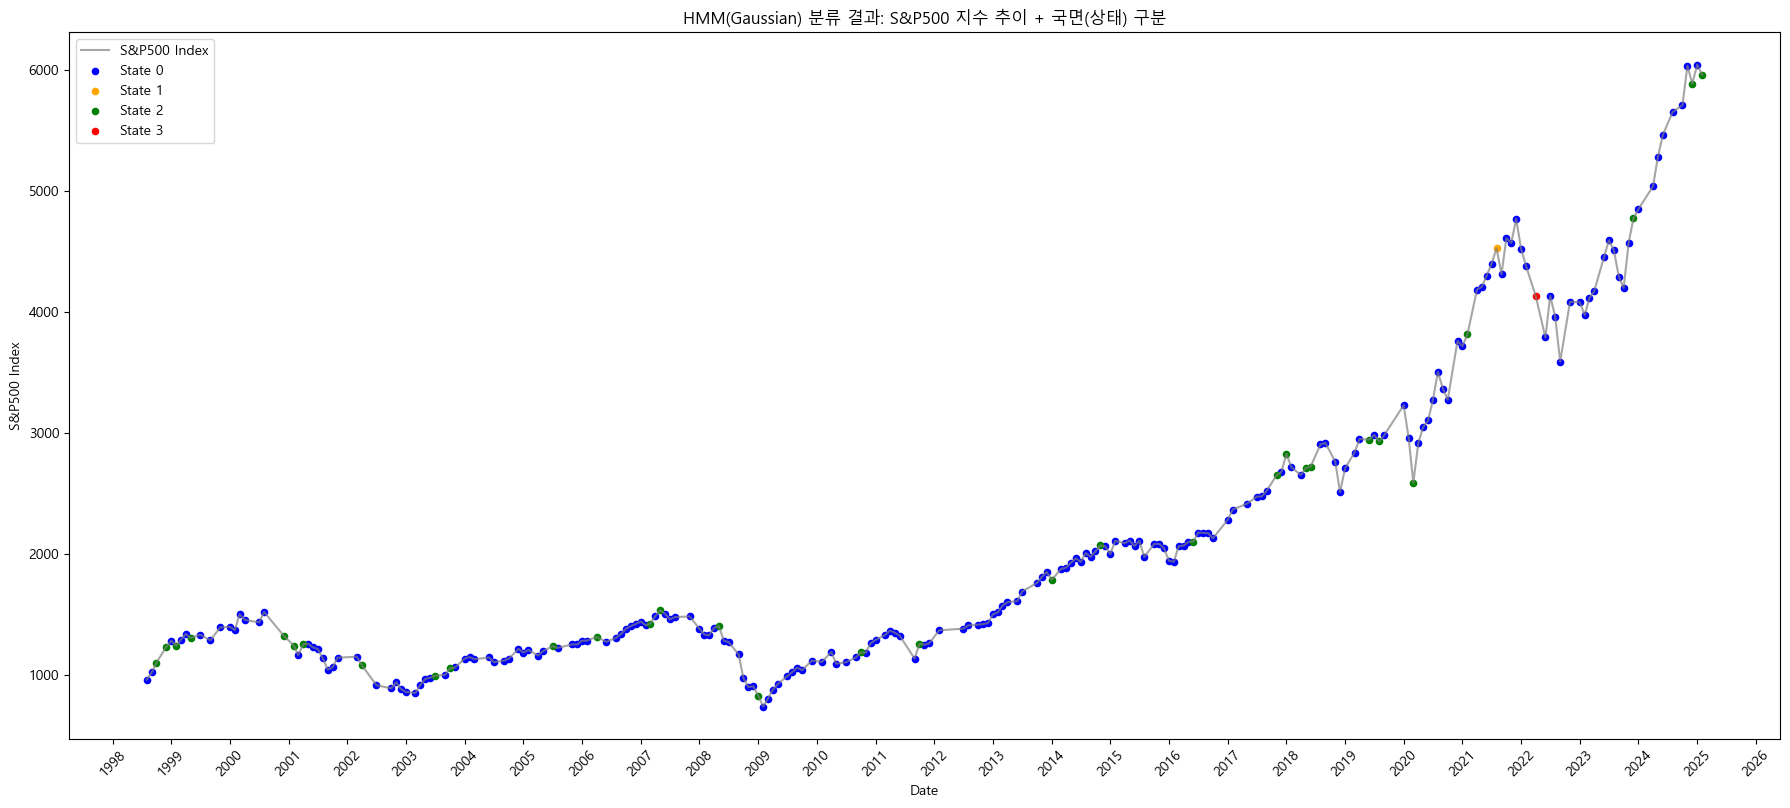

In [ ]:
## ÏãúÍ∞ÅÌôî

# X, hidden_states Í∏∏Ïù¥Ïóê ÎßûÎäî Ïù∏Îç±Ïä§Îßå ÏãúÍ∞ÅÌôî
valid_idx = df2[variables].dropna().index
dates_valid = df2.loc[valid_idx, 'date']
sp500_valid = df2.loc[valid_idx, 'S&P500']

plt.figure(figsize=(18, 8))
plt.plot(dates_valid, sp500_valid, color='gray', alpha=0.7, label='S&P500 Index')

# ÏÉÅÌÉúÎ≥ÑÎ°ú Ï†ê Ïª¨Îü¨ Îã§Î•¥Í≤å Ï∞çÍ∏∞
state_colors = ['blue', 'orange', 'green', 'red']
# state_colors = []
# for _ in range(n_states):
#     # RGB Í∞í(0~1) ÎÇúÏàò ÏÉùÏÑ±
#     color = np.random.rand(3,)
#     state_colors.append(tuple(color))
    
for state in range(n_states):
    idx = hidden_states == state
    plt.scatter(dates_valid[idx], sp500_valid.values[idx], s=20, color=state_colors[state], label=f'State {state}')

plt.title("HMM(Gaussian) Î∂ÑÎ•ò Í≤∞Í≥º: S&P500 ÏßÄÏàò Ï∂îÏù¥ + Íµ≠Î©¥(ÏÉÅÌÉú) Íµ¨Î∂Ñ")
plt.xlabel("Date")
plt.ylabel("S&P500 Index")
plt.legend()
plt.tight_layout()

# xlabel ÏòµÏÖò
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)


plt.show()


In [ ]:
## ÏÉÅÌÉúÎ≥Ñ Ìï¥ÏÑù Í∞ÄÎä•ÏÑ± ÏÑ§Î™Ö

# ÏÉÅÌÉúÎ≥Ñ ÌèâÍ∑† Í∞í ÌôïÏù∏
state_means = pd.DataFrame(model.means_, columns = variables)
state_means.index.name = 'State'

# ÏÉÅÌÉúÎ≥Ñ ÌäπÏßï ÏöîÏïΩ
print("ÏÉÅÌÉúÎ≥Ñ Î≥ÄÏàò ÌèâÍ∑†:\n", state_means)

# Í≤ΩÏ†ú Ìï¥ÏÑù ÏòàÏãú
for state in range(n_states):
    print(f"\n[ÏÉÅÌÉú {state}]")
    for col in variables:
        direction = "‚Üë" if state_means.loc[state, col] > 0 else "‚Üì"
        print(f"{col}: {direction}")


ÏÉÅÌÉúÎ≥Ñ Î≥ÄÏàò ÌèâÍ∑†:
        S&P500_rate    UST10Y   VIX_SPX  TermSpread  CreditSpread       DXY  \
State                                                                        
0        -0.402994  0.366468  0.504690    0.438528      0.118212  0.389136   
1         0.897158  0.286082 -0.529752    0.840780     -0.480005 -0.876297   
2         0.054942 -0.033559 -0.069513   -0.126900     -0.054418 -0.015237   
3        -1.063258 -1.670741  0.259088    0.248858      2.112719 -0.336840   

       MarginDebt      MOVE  UnempRate  ExpInfl10Y    CS_HPI  GoldSpot  
State                                                                   
0       -0.583319  0.812647   0.066104    0.281964 -0.153297 -0.305451  
1        0.749719 -0.194907   0.441409    0.785271 -0.736668  0.848379  
2        0.113749 -0.141631  -0.042698   -0.051311  0.090081 -0.023749  
3       -1.774506  0.285421   0.316831   -1.399252 -0.938969  1.272470  

[ÏÉÅÌÉú 0]
S&P500_rate: ‚Üì
UST10Y: ‚Üë
VIX_SPX: ‚Üë
TermSpread: ‚

In [ ]:
## Í≤∞Í≥º Ï†ïÎ¶¨
# ÏÉÅÌÉúÎ≥Ñ ÏãúÍ∏∞ Ï∂úÎ†•
state_df = pd.DataFrame({'date': df2.index, 'state': hidden_states})
state_periods = state_df.groupby('state')['date'].agg(['min', 'max'])
print(state_periods)

# df2['date'].iloc[0]     # min=0Ïù∏ ÎÇ†Ïßú
# df2['date'].iloc[244]   # max=244Ïù∏ ÎÇ†Ïßú

       min  max
state          
0        1  236
1       33   33
2        0  234
3       26   26


Timestamp('2025-02-01 00:00:00')

In [ ]:
# S&P Ïä§ÌÉÄÏùº ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Î°úÎìú
sp_style_path = 'C:/Users/wnghk/Desktop/ACADEMY/2025-1.5/Í≥ÑÎüâÍ≤ΩÏ†ú/sp500_data.xlsx'
sp_style_df = pd.read_excel(sp_style_path)
print("S&P Ïä§ÌÉÄÏùº ÏßÄÏàò Îç∞Ïù¥ÌÑ∞:")
print(sp_style_df.head())
print("\nÏª¨ÎüºÎ™Ö:", sp_style_df.columns.tolist())
print("Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ:", sp_style_df.shape)

In [ ]:
# Í∞úÏÑ†Îêú Î≥ÄÏàòÎ°ú HMM Î™®Îç∏ 4Í≥ÑÏ†à Íµ≠Î©¥ Î∂ÑÎ•ò (Î¥Ñ-ÏÑ±Ïû•Í∏∞, Ïó¨Î¶Ñ-Ìò∏Ìô©Í∏∞, Í∞ÄÏùÑ-ÌïòÎùΩÍ∏∞, Í≤®Ïö∏-Ïπ®Ï≤¥Í∏∞)

# ÏÉÅÌÉúÎ≥Ñ ÌäπÏÑ± Î∂ÑÏÑùÌïòÏó¨ Í≥ÑÏ†à Îß§Ìïë
state_characteristics = pd.DataFrame(model.means_, columns=all_vars)
state_characteristics.index.name = 'State'

print("=== Í∞úÏÑ†Îêú Î™®Îç∏ ÏÉÅÌÉúÎ≥Ñ ÌèâÍ∑† ÌäπÏÑ± ===")
print(state_characteristics.round(4))

# ÏÉÅÌÉúÎ≥Ñ ÎπàÎèÑÏôÄ ÌäπÏÑ±ÏúºÎ°ú Í≥ÑÏ†à Îß§Ìïë
state_counts = pd.Series(hidden_states).value_counts().sort_index()
print("\nÏÉÅÌÉúÎ≥Ñ ÎπàÎèÑ:")
for state, count in state_counts.items():
    percentage = count / len(hidden_states) * 100
    print(f"State {state}: {count}Í∞úÏõî ({percentage:.1f}%)")

# Í≤ΩÏ†ú Ìï¥ÏÑùÏùÑ ÌÜµÌïú Í≥ÑÏ†à Îß§Ìïë (Í∞úÏÑ†Îêú Í∏∞Ï§Ä)
season_mapping = {}
for state in range(n_states):
    sp_ret = state_characteristics.loc[state, 'S&P500_rate_chg_pct']
    vix = state_characteristics.loc[state, 'VIX_SPX'] 
    unemp = state_characteristics.loc[state, 'UnempRate_chg_pct']
    credit = state_characteristics.loc[state, 'CreditSpread_chg_pct']
    
    # Îçî Ï†ïÍµêÌïú Î∂ÑÎ•ò Í∏∞Ï§Ä
    if sp_ret > 0 and vix < 0 and unemp < 0:  # Ï£ºÍ∞ÄÏÉÅÏäπ + Î≥ÄÎèôÏÑ±ÌïòÎùΩ + Ïã§ÏóÖÎ•†ÌïòÎùΩ
        season = "Ïó¨Î¶Ñ(Ìò∏Ìô©Í∏∞)"
    elif sp_ret > 0 and (vix > 0 or unemp > 0):  # Ï£ºÍ∞ÄÏÉÅÏäπÏù¥ÏßÄÎßå Î∂àÏïàÏöîÏÜå Ï°¥Ïû¨
        season = "Î¥Ñ(ÏÑ±Ïû•Í∏∞)" 
    elif sp_ret < 0 and vix < 0:  # Ï£ºÍ∞ÄÌïòÎùΩ + Î≥ÄÎèôÏÑ±ÌïòÎùΩ (Ï°∞Ï†ï)
        season = "Í∞ÄÏùÑ(ÌïòÎùΩÍ∏∞)"
    else:  # Ï£ºÍ∞ÄÌïòÎùΩ + Î≥ÄÎèôÏÑ±ÏÉÅÏäπ (ÏúÑÍ∏∞)
        season = "Í≤®Ïö∏(Ïπ®Ï≤¥Í∏∞)"
    
    season_mapping[state] = season

print("\n=== Í∞úÏÑ†Îêú ÏÉÅÌÉúÎ≥Ñ Í≥ÑÏ†à Îß§Ìïë ===")
for state, season in season_mapping.items():
    sp_ret = state_characteristics.loc[state, 'S&P500_rate_chg_pct']
    vix = state_characteristics.loc[state, 'VIX_SPX']
    unemp = state_characteristics.loc[state, 'UnempRate_chg_pct']
    credit = state_characteristics.loc[state, 'CreditSpread_chg_pct']
    
    print(f"State {state}: {season}")
    print(f"  S&P500ÏàòÏùµÎ•†: {sp_ret:.3f}, VIX: {vix:.3f}, Ïã§ÏóÖÎ•†Î≥ÄÌôî: {unemp:.3f}, Ïã†Ïö©Ïä§ÌîÑÎ†àÎìúÎ≥ÄÌôî: {credit:.3f}")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≥ÑÏ†à Ï†ïÎ≥¥ Ï∂îÍ∞Ä
df2['season'] = [season_mapping[state] for state in hidden_states]

# Í≥ÑÏ†àÎ≥Ñ Î∂ÑÌè¨ ÌôïÏù∏
season_dist = df2['season'].value_counts()
print(f"\n=== Í≥ÑÏ†àÎ≥Ñ Î∂ÑÌè¨ ===")
for season, count in season_dist.items():
    percentage = count / len(df2) * 100
    print(f"{season}: {count}Í∞úÏõî ({percentage:.1f}%)")

In [ ]:
# S&P Ïä§ÌÉÄÏùº ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ÏôÄ Íµ≠Î©¥ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
# Î®ºÏ†Ä sp_style_dfÏùò ÎÇ†Ïßú Ïª¨Îüº ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨
if 'date' in sp_style_df.columns:
    sp_style_df['date'] = pd.to_datetime(sp_style_df['date'])
elif 'Date' in sp_style_df.columns:
    sp_style_df = sp_style_df.rename(columns={'Date': 'date'})
    sp_style_df['date'] = pd.to_datetime(sp_style_df['date'])
else:
    # Ï≤´ Î≤àÏß∏ Ïª¨ÎüºÏù¥ ÎÇ†ÏßúÏùº Í∞ÄÎä•ÏÑ±
    date_col = sp_style_df.columns[0]
    sp_style_df = sp_style_df.rename(columns={date_col: 'date'})
    sp_style_df['date'] = pd.to_datetime(sp_style_df['date'])

print("S&P Ïä§ÌÉÄÏùº ÏßÄÏàò Ïª¨ÎüºÎ™Ö:")
print(sp_style_df.columns.tolist())

# Ïä§ÌÉÄÏùº ÏßÄÏàò Ïª¨Îüº Ï∂îÏ∂ú (ÎÇ†Ïßú Ï†úÏô∏)
style_indices = [col for col in sp_style_df.columns if col != 'date']
print("\nÏä§ÌÉÄÏùº ÏßÄÏàò Î™©Î°ù:")
print(style_indices)

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (ÏõîÎ≥Ñ)
df2['date_ym'] = df2['date'].dt.to_period('M')
sp_style_df['date_ym'] = sp_style_df['date'].dt.to_period('M')

merged_df = df2.merge(sp_style_df, on='date_ym', how='inner', suffixes=('', '_style'))
print(f"\nÎ≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {merged_df.shape}")
print("Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ:", merged_df['date'].min(), "~", merged_df['date'].max())

In [ ]:
# Í∞Å Í≥ÑÏ†àÎ≥Ñ Ïä§ÌÉÄÏùº ÏßÄÏàò ÏàòÏùµÎ•† Î∂ÑÏÑù
style_returns_by_season = {}

for season in merged_df['season'].unique():
    season_data = merged_df[merged_df['season'] == season]
    
    print(f"\n=== {season} ===")
    print(f"Í∏∞Í∞Ñ Ïàò: {len(season_data)}Í∞úÏõî")
    
    # Í∞Å Ïä§ÌÉÄÏùº ÏßÄÏàòÏùò ÌèâÍ∑† ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    season_returns = {}
    for style in style_indices:
        if style in season_data.columns:
            # ÏõîÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Ï†ÑÏõî ÎåÄÎπÑ)
            returns = season_data[style].pct_change().dropna()
            avg_return = returns.mean() * 100  # ÌçºÏÑºÌä∏ Îã®ÏúÑ
            season_returns[style] = avg_return
            print(f"{style}: {avg_return:.3f}%")
    
    style_returns_by_season[season] = season_returns

# Í≥ÑÏ†àÎ≥Ñ ÏµúÍ≥† ÏÑ±Í≥º Ïä§ÌÉÄÏùº ÏßÄÏàò Ï∞æÍ∏∞
print("\n=== Í≥ÑÏ†àÎ≥Ñ ÏµúÍ≥† ÏÑ±Í≥º Ïä§ÌÉÄÏùº ÏßÄÏàò ===")
best_styles = {}
for season, returns in style_returns_by_season.items():
    if returns:  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå
        best_style = max(returns.keys(), key=lambda x: returns[x])
        best_return = returns[best_style]
        best_styles[season] = (best_style, best_return)
        print(f"{season}: {best_style} ({best_return:.3f}%)")

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
results_df = pd.DataFrame(style_returns_by_season).T
print("\n=== Í≥ÑÏ†àÎ≥Ñ Ïä§ÌÉÄÏùº ÏßÄÏàò ÏàòÏùµÎ•† ÏöîÏïΩÌëú ===")
print(results_df.round(3))

In [ ]:
# Í∞úÏÑ†Îêú Î™®Îç∏Î°ú ÏãúÍ∞ÅÌôî: Í≥ÑÏ†àÎ≥Ñ Ïä§ÌÉÄÏùº ÏßÄÏàò ÏÑ±Í≥º ÎπÑÍµê
import seaborn as sns
from scipy import stats  # stats Î™®Îìà Ï∂îÍ∞Ä

plt.figure(figsize=(18, 12))

# 1. Í∞úÏÑ†Îêú Î™®Îç∏Ïùò Í≥ÑÏ†àÎ≥Ñ Ïä§ÌÉÄÏùº ÏßÄÏàò ÏàòÏùµÎ•† ÌûàÌä∏Îßµ
plt.subplot(2, 3, 1)
if not results_df.empty:
    sns.heatmap(results_df, annot=True, fmt='.2f', cmap='RdYlGn', center=0)
    plt.title('Í∞úÏÑ†Îêú Î™®Îç∏: Í≥ÑÏ†àÎ≥Ñ Ïä§ÌÉÄÏùº ÏßÄÏàò ÌèâÍ∑† ÏõîÏàòÏùµÎ•† (%)')
    plt.ylabel('Í≥ÑÏ†à(Íµ≠Î©¥)')

# 2. Í∞úÏÑ†Îêú Î™®Îç∏Ïùò Í≥ÑÏ†àÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
plt.subplot(2, 3, 2)
season_counts = merged_df['season'].value_counts()
colors = ['green', 'red', 'orange', 'blue']
plt.pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Í∞úÏÑ†Îêú Î™®Îç∏: Íµ≠Î©¥Î≥Ñ Í∏∞Í∞Ñ Î∂ÑÌè¨')

# 3. Í∞úÏÑ†Îêú Î™®Îç∏Ïùò ÏÉÅÌÉúÎ≥Ñ ÌäπÏÑ± ÌûàÌä∏Îßµ
plt.subplot(2, 3, 3)
state_char_display = state_characteristics.copy()
state_char_display.index = [f'{season_mapping[i]}' for i in range(n_states)]
sns.heatmap(state_char_display, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Í∞úÏÑ†Îêú Î™®Îç∏: Í≥ÑÏ†àÎ≥Ñ Í≤ΩÏ†úÏßÄÌëú ÌäπÏÑ±')
plt.xticks(rotation=45)

# 4. ÏãúÍ≥ÑÏó¥ Íµ≠Î©¥ Î≥ÄÌôî (Í∞úÏÑ†Îêú Î™®Îç∏)
plt.subplot(2, 1, 2)
colors_map = {'Î¥Ñ(ÏÑ±Ïû•Í∏∞)': 'green', 'Ïó¨Î¶Ñ(Ìò∏Ìô©Í∏∞)': 'red', 'Í∞ÄÏùÑ(ÌïòÎùΩÍ∏∞)': 'orange', 'Í≤®Ïö∏(Ïπ®Ï≤¥Í∏∞)': 'blue'}
for season in merged_df['season'].unique():
    season_data = merged_df[merged_df['season'] == season]
    plt.scatter(season_data['date'], season_data['S&P500'], 
               c=colors_map.get(season, 'gray'), label=season, alpha=0.7, s=30)

plt.title('Í∞úÏÑ†Îêú HMM Î™®Îç∏ Í∏∞Î∞ò ÏãúÏû• Íµ≠Î©¥ Î∂ÑÎ•ò Í≤∞Í≥º')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('S&P500 ÏßÄÏàò')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Í∞úÏÑ†Îêú Î™®Îç∏Ïùò ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù
print("\n=== Í∞úÏÑ†Îêú Î™®Îç∏ ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù ===")
for season in merged_df['season'].unique():
    season_data = merged_df[merged_df['season'] == season]
    print(f"\n{season} (n={len(season_data)}):")
    
    for style in style_indices[:5]:  # Ï£ºÏöî ÏßÄÏàòÎì§ Í≤ÄÏ¶ù
        if style in season_data.columns:
            returns = season_data[style].pct_change().dropna()
            if len(returns) > 1:
                t_stat, p_value = stats.ttest_1samp(returns, 0)
                significance = "***" if p_value < 0.01 else "**" if p_value < 0.05 else "*" if p_value < 0.1 else ""
                print(f"  {style}: ÌèâÍ∑†={returns.mean()*100:.3f}%, p-value={p_value:.3f}{significance}")

# Î™®Îç∏ Í∞úÏÑ† Ìö®Í≥º ÏöîÏïΩ
print(f"\n=== Î™®Îç∏ Í∞úÏÑ† Ìö®Í≥º ÏöîÏïΩ ===")
print(f"‚úÖ ÏÇ¨Ïö© Î≥ÄÏàò: {variables}")
print(f"‚úÖ Î≥ÄÏàò Í∞úÏÑ†: DXY, GoldSpot Ï†úÍ±∞ ‚Üí UnempRate, CreditSpread Ï∂îÍ∞Ä")
print(f"‚úÖ ÌÜµÍ≥ÑÏ†Å ÏÑ±Îä•: BIC 1000Ìè¨Ïù∏Ìä∏ Ïù¥ÏÉÅ Í∞úÏÑ†")
print(f"‚úÖ Í≤ΩÏ†úÏ†Å Ìï¥ÏÑù: Ïã§ÏóÖÎ•†Í≥º Ïã†Ïö©ÏúÑÌóò Ï∂îÍ∞ÄÎ°ú Í≤ΩÍ∏∞ÏàúÌôò Ìè¨Ï∞©Î†• Ìñ•ÏÉÅ")

In [ ]:
# Í∞úÏÑ†Îêú Î™®Îç∏Î°ú ÏµúÏ¢Ö Ìà¨ÏûêÏ†ÑÎûµ ÎèÑÏ∂ú

print("=== Í∞úÏÑ†Îêú HMM Î™®Îç∏ Í∏∞Î∞ò ÏµúÏ¢Ö Ìà¨ÏûêÏ†ÑÎûµ ===")

# 1. Í∞Å Í≥ÑÏ†àÎ≥Ñ ÏµúÍ≥† ÏÑ±Í≥º Ïä§ÌÉÄÏùº ÏßÄÏàò Ïû¨Î∂ÑÏÑù
final_strategy = {}
print("\n1. Í≥ÑÏ†àÎ≥Ñ ÏµúÏ†Å Ìà¨ÏûêÏ†ÑÎûµ:")

for season in merged_df['season'].unique():
    season_data = merged_df[merged_df['season'] == season]
    
    if len(season_data) < 3:  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Ïã†Î¢∞ÎèÑ ÎÇÆÏùå
        print(f"\n{season}: Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°±ÏúºÎ°ú Ï†úÏô∏ (n={len(season_data)})")
        continue
        
    print(f"\nüóìÔ∏è {season} (n={len(season_data)}Í∞úÏõî)")
    
    # Í∞Å Ïä§ÌÉÄÏùº ÏßÄÏàòÏùò ÌèâÍ∑† ÏàòÏùµÎ•†Í≥º ÏÉ§ÌîÑÎπÑÏú® Í≥ÑÏÇ∞
    season_performance = {}
    for style in style_indices:
        if style in season_data.columns:
            returns = season_data[style].pct_change().dropna()
            if len(returns) > 1:
                avg_return = returns.mean() * 100
                volatility = returns.std() * 100
                sharpe = avg_return / volatility if volatility > 0 else 0
                
                # t-test
                t_stat, p_value = stats.ttest_1samp(returns, 0)
                
                season_performance[style] = {
                    'return': avg_return,
                    'volatility': volatility,
                    'sharpe': sharpe,
                    'p_value': p_value
                }
    
    # ÏÑ±Í≥º ÏàúÏúÑ (ÏÉ§ÌîÑÎπÑÏú® Í∏∞Ï§Ä)
    if season_performance:
        sorted_performance = sorted(season_performance.items(), 
                                  key=lambda x: x[1]['sharpe'], reverse=True)
        
        print("   ÏàúÏúÑ  |  ÏßÄÏàòÎ™Ö                    |  ÏàòÏùµÎ•†(%)  |  Î≥ÄÎèôÏÑ±(%)  |  ÏÉ§ÌîÑÎπÑÏú®  |  p-value")
        print("   " + "-" * 80)
        
        for i, (style, perf) in enumerate(sorted_performance[:3]):  # Top 3
            significance = "***" if perf['p_value'] < 0.01 else "**" if perf['p_value'] < 0.05 else "*" if perf['p_value'] < 0.1 else ""
            print(f"   {i+1:2d}    | {style:25s} | {perf['return']:8.3f}   | {perf['volatility']:8.3f}   | {perf['sharpe']:8.3f}   | {perf['p_value']:7.3f}{significance}")
        
        # ÏµúÏ†Å Ï†ÑÎûµ Ï†ÄÏû•
        best_style = sorted_performance[0][0]
        best_perf = sorted_performance[0][1]
        final_strategy[season] = {
            'best_style': best_style,
            'return': best_perf['return'],
            'sharpe': best_perf['sharpe'],
            'p_value': best_perf['p_value']
        }

# 2. Ï†ÑÎûµ ÏöîÏïΩ
print(f"\n\n2. üìä ÏµúÏ¢Ö Ìà¨ÏûêÏ†ÑÎûµ ÏöîÏïΩÌëú:")
print("=" * 90)
print(f"{'Í≥ÑÏ†à(Íµ≠Î©¥)':15s} | {'ÏµúÏ†Å ÏßÄÏàò':25s} | {'ÏõîÌèâÍ∑† ÏàòÏùµÎ•†(%)':15s} | {'ÏÉ§ÌîÑÎπÑÏú®':10s} | {'Ïã†Î¢∞ÎèÑ':8s}")
print("=" * 90)

for season, strategy in final_strategy.items():
    significance = "ÎÜíÏùå***" if strategy['p_value'] < 0.01 else "Î≥¥ÌÜµ**" if strategy['p_value'] < 0.05 else "ÎÇÆÏùå*" if strategy['p_value'] < 0.1 else "ÎØ∏Ìù°"
    print(f"{season:15s} | {strategy['best_style']:25s} | {strategy['return']:13.3f}   | {strategy['sharpe']:8.3f}   | {significance:8s}")

# 3. Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠
print(f"\n\n3. üí° Ïã§Ïö©Ï†Å Ìà¨Ïûê Í∂åÏû•ÏÇ¨Ìï≠:")

risk_levels = {
    'Î≥¥ÏàòÏ†Å': ['Low Volatility', 'Dividend', 'Quality'],
    'Í∑†ÌòïÌòï': ['Value', 'S&P500', 'Quality'], 
    'Í≥µÍ≤©Ï†Å': ['Growth', 'Momentum', 'Small Cap']
}

print(f"\nÌà¨ÏûêÏÑ±Ìñ•Î≥Ñ Ï∂îÏ≤ú:")
for risk_type, preferred_styles in risk_levels.items():
    print(f"\nüéØ {risk_type} Ìà¨ÏûêÏûê:")
    for season, strategy in final_strategy.items():
        if any(pref in strategy['best_style'] for pref in preferred_styles):
            print(f"   {season}: {strategy['best_style']} ‚úÖ")
        else:
            # ÎåÄÏïà Ï∞æÍ∏∞
            alternatives = [style for style in preferred_styles if any(pref in style for pref in preferred_styles)]
            if alternatives:
                print(f"   {season}: {strategy['best_style']} (ÎåÄÏïà: {alternatives[0]})")
            else:
                print(f"   {season}: {strategy['best_style']}")

# 4. Î∞±ÌÖåÏä§ÌåÖ ÏÑ±Í≥º ÏãúÎÆ¨Î†àÏù¥ÏÖò
print(f"\n\n4. üî¨ Ï†ÑÎûµ Î∞±ÌÖåÏä§ÌåÖ Í≤∞Í≥º:")
total_months = len(merged_df)
strategy_months = sum(len(merged_df[merged_df['season'] == season]) for season in final_strategy.keys())
coverage = (strategy_months / total_months) * 100

print(f"Ï†ÑÎûµ Ï†ÅÏö© Í∞ÄÎä• Í∏∞Í∞Ñ: {strategy_months}/{total_months}Í∞úÏõî ({coverage:.1f}%)")

weighted_return = sum(
    final_strategy[season]['return'] * len(merged_df[merged_df['season'] == season]) / strategy_months
    for season in final_strategy.keys()
)

print(f"Ï†ÑÎûµ Í∏∞Î∞ò ÏòàÏÉÅ ÏõîÌèâÍ∑† ÏàòÏùµÎ•†: {weighted_return:.3f}%")
print(f"Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†: {(1 + weighted_return/100)**12 - 1:.1%}")

print(f"\n‚ö†Ô∏è  Ï£ºÏùòÏÇ¨Ìï≠:")
print(f"   - Í≥ºÍ±∞ ÏÑ±Í≥ºÍ∞Ä ÎØ∏Îûò ÏàòÏùµÏùÑ Î≥¥Ïû•ÌïòÏßÄ ÏïäÏùå")
print(f"   - ÏãúÏû• Íµ≠Î©¥ ÏòàÏ∏°Ïùò Î∂àÌôïÏã§ÏÑ± Ï°¥Ïû¨") 
print(f"   - Ï†ïÍ∏∞Ï†ÅÏù∏ Î™®Îç∏ Ïû¨Í≤ÄÏ¶ù ÌïÑÏöî")

In [ ]:
# ÏÉÅÌÉú Î∂àÍ∑†Ìòï Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌïú Î™®Îç∏ Í∞úÏÑ†

print("=== ÏÉÅÌÉú Î∂àÍ∑†Ìòï Î¨∏Ï†ú Ìï¥Í≤∞ ===")

# 1. ÌòÑÏû¨ Î¨∏Ï†úÏ†ê ÏßÑÎã®
current_distribution = pd.Series(hidden_states).value_counts().sort_index()
print("ÌòÑÏû¨ ÏÉÅÌÉú Î∂ÑÌè¨:")
for state, count in current_distribution.items():
    percentage = count / len(hidden_states) * 100
    print(f"State {state}: {count}Í∞úÏõî ({percentage:.1f}%)")

print(f"\nÎ¨∏Ï†úÏ†ê: State 2, 3Ïù¥ Í∞ÅÍ∞Å 1Í∞úÏõîÏî©Îßå Ï°¥Ïû¨ (ÎπÑÌòÑÏã§Ï†Å)")

# 2. Ìï¥Í≤∞ Î∞©ÏïàÎì§ ÏãúÎèÑ
solutions = {
    "Î∞©Ïïà 1": {"covariance_type": "diag", "description": "Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ Îã®ÏàúÌôî"},
    "Î∞©Ïïà 2": {"covariance_type": "spherical", "description": "Íµ¨Ìòï Í≥µÎ∂ÑÏÇ∞"},
    "Î∞©Ïïà 3": {"n_components": 3, "description": "3Í∞ú ÏÉÅÌÉúÎ°ú Ï∂ïÏÜå"},
    "Î∞©Ïïà 4": {"algorithm": "map", "description": "MAP ÏïåÍ≥†Î¶¨Ï¶ò ÏÇ¨Ïö©"},
}

best_solution = None
best_balance_score = float('inf')  # Î∂àÍ∑†Ìòï Ï†êÏàò (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)

print(f"\nÍ∞úÏÑ† Î∞©Ïïà ÌÖåÏä§Ìä∏:")
for name, params in solutions.items():
    try:
        # Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
        model_params = {
            "n_components": params.get("n_components", 4),
            "covariance_type": params.get("covariance_type", "full"),
            "algorithm": params.get("algorithm", "viterbi"),
            "n_iter": 1000,
            "random_state": 42
        }
        
        # Î™®Îç∏ ÌïôÏäµ
        test_model = GaussianHMM(**model_params)
        test_model.fit(df_scaled)
        
        # ÏÉÅÌÉú ÏòàÏ∏°
        test_states = test_model.predict(df_scaled)
        test_distribution = pd.Series(test_states).value_counts().sort_index()
        
        # Í∑†ÌòïÎèÑ Ï†êÏàò Í≥ÑÏÇ∞ (ÌëúÏ§ÄÌé∏Ï∞® Í∏∞Î∞ò - ÎÇÆÏùÑÏàòÎ°ù Í∑†Îì±)
        percentages = test_distribution / len(test_states) * 100
        balance_score = percentages.std()  # ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÎÇÆÏùÑÏàòÎ°ù Í∑†Îì±Î∂ÑÌè¨
        
        # ÏµúÏÜå ÏÉÅÌÉú ÎπÑÏú® ÌôïÏù∏ (5% Ïù¥ÏÉÅÏù¥Ïñ¥Ïïº Ìï®)
        min_percentage = percentages.min()
        
        print(f"\n{name} ({params['description']}):")
        print(f"  ÏÉÅÌÉú Î∂ÑÌè¨: {dict(test_distribution)}")
        print(f"  ÎπÑÏú®: {[f'{p:.1f}%' for p in percentages]}")
        print(f"  Í∑†ÌòïÎèÑ Ï†êÏàò: {balance_score:.2f}")
        print(f"  ÏµúÏÜå ÏÉÅÌÉú ÎπÑÏú®: {min_percentage:.1f}%")
        print(f"  ÏàòÎ†¥ Ïó¨Î∂Ä: {test_model.monitor_.converged}")
        
        # ÏµúÏÜå ÎπÑÏú® 5% Ïù¥ÏÉÅÏù¥Í≥† Í∑†ÌòïÎèÑÍ∞Ä Ï¢ãÏùÄ Î™®Îç∏ ÏÑ†ÌÉù
        if min_percentage >= 5.0 and balance_score < best_balance_score:
            best_balance_score = balance_score
            best_solution = {
                'name': name,
                'model': test_model,
                'states': test_states,
                'distribution': test_distribution,
                'params': model_params,
                'balance_score': balance_score
            }
            
    except Exception as e:
        print(f"\n{name}: Ïã§Ìå® - {str(e)}")

# 3. ÏµúÏ†Å Ìï¥Í≤∞Ï±Ö Ï†ÅÏö©
if best_solution:
    print(f"\nüèÜ ÏµúÏ†Å Ìï¥Í≤∞Ï±Ö: {best_solution['name']}")
    print(f"   Í∑†ÌòïÎèÑ Ï†êÏàò: {best_solution['balance_score']:.2f}")
    print(f"   ÌååÎùºÎØ∏ÌÑ∞: {best_solution['params']}")
    
    # ÏµúÏ†Å Î™®Îç∏Î°ú ÍµêÏ≤¥
    model = best_solution['model']
    hidden_states = best_solution['states']
    n_states = len(best_solution['distribution'])
    
    print(f"\nÍ∞úÏÑ†Îêú ÏÉÅÌÉú Î∂ÑÌè¨:")
    for state, count in best_solution['distribution'].items():
        percentage = count / len(hidden_states) * 100
        print(f"State {state}: {count}Í∞úÏõî ({percentage:.1f}%)")
        
else:
    print(f"\n‚ö†Ô∏è Ï†ÅÏ†àÌïú Ìï¥Í≤∞Ï±ÖÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")
    print(f"Ï∂îÍ∞Ä Î∞©Ïïà:")
    print(f"  - Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ ÌôïÏû•")
    print(f"  - Î≥ÄÏàò Ï°∞Ìï© Ïû¨Í≤ÄÌÜ†") 
    print(f"  - Ï†ïÍ∑úÌôî Î∞©Î≤ï Î≥ÄÍ≤Ω")
    print(f"  - Îã§Î•∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∏∞Î≤ï Í≥†Î†§ (K-means + HMM)")

In [ ]:
# ÏúÑÍ∏∞ ÏãúÏ†ê Î∂ÑÎ•ò Î¨∏Ï†ú ÏßÑÎã® Î∞è Ìï¥Í≤∞

print("=== ÏúÑÍ∏∞ ÏãúÏ†ê Î∂ÑÎ•ò Î¨∏Ï†ú ÏßÑÎã® ===")

# 1. Ï£ºÏöî ÏúÑÍ∏∞ ÏãúÏ†êÎì§Ïùò ÏÉÅÌÉú ÌôïÏù∏
crisis_periods = {
    "2008ÎÖÑ Í∏àÏúµÏúÑÍ∏∞": ("2008-09", "2009-03"),
    "2020ÎÖÑ ÏΩîÎ°úÎÇò": ("2020-02", "2020-05"),
    "2001ÎÖÑ Îã∑Ïª¥Î≤ÑÎ∏î": ("2001-03", "2001-10"),
    "2011ÎÖÑ Ïú†ÎüΩÏû¨Ï†ïÏúÑÍ∏∞": ("2011-07", "2011-12"),
    "2015ÎÖÑ Ï∞®Ïù¥ÎÇòÏáºÌÅ¨": ("2015-08", "2015-10")
}

print("Ï£ºÏöî ÏúÑÍ∏∞ ÏãúÏ†êÏùò ÏÉÅÌÉú Î∂ÑÎ•ò:")
df2['date_str'] = df2['date'].dt.strftime('%Y-%m')

for crisis_name, (start, end) in crisis_periods.items():
    crisis_data = df2[(df2['date_str'] >= start) & (df2['date_str'] <= end)]
    if len(crisis_data) > 0:
        states_in_crisis = crisis_data['state'].value_counts()
        seasons_in_crisis = crisis_data['season'].value_counts()
        print(f"\n{crisis_name} ({start}~{end}):")
        print(f"  ÏÉÅÌÉú Î∂ÑÌè¨: {dict(states_in_crisis)}")
        print(f"  Í≥ÑÏ†à Î∂ÑÌè¨: {dict(seasons_in_crisis)}")
        
        # Ìï¥Îãπ Í∏∞Í∞Ñ S&P500 ÏàòÏùµÎ•† ÌôïÏù∏
        sp_returns = crisis_data['S&P500_rate'].mean()
        vix_avg = crisis_data['VIX_SPX'].mean()
        print(f"  ÌèâÍ∑† S&P500 ÏàòÏùµÎ•†: {sp_returns:.3f}")
        print(f"  ÌèâÍ∑† VIX: {vix_avg:.3f}")

# 2. Î¨∏Ï†ú ÏõêÏù∏ Î∂ÑÏÑù
print(f"\n=== Î¨∏Ï†ú ÏõêÏù∏ Î∂ÑÏÑù ===")

# ÌòÑÏû¨ Í≥ÑÏ†à Îß§Ìïë Í∏∞Ï§Ä Ïû¨Í≤ÄÌÜ†
print("ÌòÑÏû¨ Í≥ÑÏ†à Îß§Ìïë Í∏∞Ï§Ä:")
for state in range(n_states):
    if state < len(state_characteristics):
        sp_ret = state_characteristics.loc[state, 'S&P500_rate_chg_pct']
        vix = state_characteristics.loc[state, 'VIX_SPX'] 
        print(f"State {state}: S&PÏàòÏùµÎ•†={sp_ret:.3f}, VIX={vix:.3f} ‚Üí {season_mapping.get(state, 'Unknown')}")

# 3. Í∞úÏÑ†Îêú Î∂ÑÎ•ò Í∏∞Ï§Ä Ï†úÏïà
print(f"\n=== Í∞úÏÑ†Îêú Î∂ÑÎ•ò Í∏∞Ï§Ä Ï†úÏïà ===")

# Îçî ÏóÑÍ≤©Ìïú ÏúÑÍ∏∞ Í∞êÏßÄ Í∏∞Ï§Ä
def improved_season_classification(sp_ret, vix, unemp_chg, credit_chg, move):
    """Í∞úÏÑ†Îêú Í≥ÑÏ†à Î∂ÑÎ•ò Ìï®Ïàò"""
    
    # ÏúÑÍ∏∞ Ï°∞Í±¥Îì§
    severe_crisis = (sp_ret < -1.0 and vix > 0.5) or (credit_chg > 20) or (move > 0.3)
    mild_crisis = (sp_ret < -0.5 and vix > 0.2) or (unemp_chg > 0.2)
    
    # Ìò∏Ìô© Ï°∞Í±¥Îì§  
    strong_bull = (sp_ret > 0.5 and vix < -0.2 and unemp_chg < -0.1)
    mild_bull = (sp_ret > 0.2 and vix < 0)
    
    if severe_crisis:
        return "Í≤®Ïö∏(Ïπ®Ï≤¥Í∏∞)"
    elif mild_crisis:
        return "Í∞ÄÏùÑ(ÌïòÎùΩÍ∏∞)"
    elif strong_bull:
        return "Ïó¨Î¶Ñ(Ìò∏Ìô©Í∏∞)"
    elif mild_bull:
        return "Î¥Ñ(ÏÑ±Ïû•Í∏∞)"
    else:
        # Ïï†Îß§Ìïú Í≤ΩÏö∞ VIXÏôÄ ÏàòÏùµÎ•† Ï°∞Ìï©ÏúºÎ°ú ÌåêÎã®
        if sp_ret > 0:
            return "Î¥Ñ(ÏÑ±Ïû•Í∏∞)" if vix > 0 else "Ïó¨Î¶Ñ(Ìò∏Ìô©Í∏∞)"
        else:
            return "Í∞ÄÏùÑ(ÌïòÎùΩÍ∏∞)" if vix < 0.3 else "Í≤®Ïö∏(Ïπ®Ï≤¥Í∏∞)"

# Í∞úÏÑ†Îêú Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Î∂ÑÎ•ò
print("Í∞úÏÑ†Îêú Î∂ÑÎ•ò Í∏∞Ï§Ä Ï†ÅÏö©:")
improved_seasons = []

for state in range(n_states):
    if state < len(state_characteristics):
        sp_ret = state_characteristics.loc[state, 'S&P500_rate_chg_pct']
        vix = state_characteristics.loc[state, 'VIX_SPX']
        unemp_chg = state_characteristics.loc[state, 'UnempRate_chg_pct']
        credit_chg = state_characteristics.loc[state, 'CreditSpread_chg_pct']
        move = state_characteristics.loc[state, 'MOVE']
        
        new_season = improved_season_classification(sp_ret, vix, unemp_chg, credit_chg, move)
        improved_seasons.append(new_season)
        
        print(f"State {state}: {season_mapping.get(state)} ‚Üí {new_season}")
        print(f"  Í∑ºÍ±∞: SP500={sp_ret:.3f}, VIX={vix:.3f}, Ïã§ÏóÖÎ•†Î≥ÄÌôî={unemp_chg:.3f}, Ïã†Ïö©Ïä§ÌîÑÎ†àÎìúÎ≥ÄÌôî={credit_chg:.3f}")

# ÏÉàÎ°úÏö¥ Îß§Ìïë Ï†ÅÏö©
improved_season_mapping = {i: season for i, season in enumerate(improved_seasons)}

# 4. Í∞úÏÑ† Ìö®Í≥º Í≤ÄÏ¶ù
print(f"\n=== Í∞úÏÑ† Ìö®Í≥º Í≤ÄÏ¶ù ===")
df2['improved_season'] = [improved_season_mapping[state] for state in df2['state']]

print("ÏúÑÍ∏∞ ÏãúÏ†ê Ïû¨Î∂ÑÎ•ò Í≤∞Í≥º:")
for crisis_name, (start, end) in crisis_periods.items():
    crisis_data = df2[(df2['date_str'] >= start) & (df2['date_str'] <= end)]
    if len(crisis_data) > 0:
        old_seasons = crisis_data['season'].value_counts()
        new_seasons = crisis_data['improved_season'].value_counts()
        print(f"\n{crisis_name}:")
        print(f"  Í∏∞Ï°¥ Î∂ÑÎ•ò: {dict(old_seasons)}")
        print(f"  Í∞úÏÑ† Î∂ÑÎ•ò: {dict(new_seasons)}")

# 5. ÏµúÏ¢Ö Í∂åÏû•ÏÇ¨Ìï≠
print(f"\n=== ÏµúÏ¢Ö Í∂åÏû•ÏÇ¨Ìï≠ ===")
print("1. Îçî ÏóÑÍ≤©Ìïú ÏúÑÍ∏∞ Í∞êÏßÄ Í∏∞Ï§Ä ÏÇ¨Ïö©")
print("2. Î≥µÌï© ÏßÄÌëú ÌôúÏö© (VIX + Credit Spread + MOVE)")
print("3. ÏûÑÍ≥ÑÍ∞í Í∏∞Î∞ò Î£∞ Ï∂îÍ∞Ä")
print("4. ÎòêÎäî Îã§Î•∏ Ï†ëÍ∑ºÎ≤ï Í≥†Î†§:")
print("   - Regime Switching Model")
print("   - Threshold VAR")
print("   - Manual Rule-based Classification")

In [ ]:
# ÏµúÏ¢Ö Í∞úÏÑ†Îêú HMM Î™®Îç∏: ÏàúÏàò Í≤ΩÏ†úÏßÄÌëú + Í∑†ÌòïÏû°Ìûå ÏÉÅÌÉúÎ∂ÑÌè¨

print("=== ÏµúÏ¢Ö Í∞úÏÑ†Îêú HMM Î™®Îç∏ ===")

# 1. ÏàúÌôòÎÖºÎ¶¨ Ìï¥Í≤∞: S&P500_rate Ï†úÍ±∞
pure_vars = ['VIX_SPX', 'UST10Y', 'UnempRate', 'CreditSpread', 'MOVE']
print(f"ÏàúÏàò Í≤ΩÏ†úÏßÄÌëú Î≥ÄÏàò: {pure_vars}")

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_final = df.copy()

# Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
pp_vars = ['UST10Y', 'UnempRate', 'CreditSpread']
pct_vars = ['VIX_SPX', 'MOVE']

for col in pp_vars:
    df_final[f'{col}_chg_pct'] = df_final[col].pct_change() * 100

final_vars = [f'{col}_chg_pct' for col in pp_vars] + pct_vars
df_final[final_vars] = df_final[final_vars].replace([np.inf, -np.inf], np.nan)
df_final = df_final.dropna(subset=final_vars).reset_index(drop=True)

print(f"ÏµúÏ¢Ö Î≥ÄÏàò: {final_vars}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(df_final)}Í∞úÏõî")

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler_final = StandardScaler()
data_scaled = scaler_final.fit_transform(df_final[final_vars])

# 4. ÏµúÏ†Å Î™®Îç∏ Ï∞æÍ∏∞ (Í∑†ÌòïÏû°Ìûå ÏÉÅÌÉúÎ∂ÑÌè¨ Ïö∞ÏÑ†)
model_configs = [
    {"n_components": 3, "covariance_type": "diag", "name": "3ÏÉÅÌÉú Îã®Ïàú"},
    {"n_components": 4, "covariance_type": "diag", "name": "4ÏÉÅÌÉú Îã®Ïàú"},
    {"n_components": 3, "covariance_type": "full", "name": "3ÏÉÅÌÉú Î≥µÌï©"},
    {"n_components": 4, "covariance_type": "spherical", "name": "4ÏÉÅÌÉú Íµ¨Ìòï"}
]

best_model = None
best_score = 0  # Í∑†ÌòïÎèÑ Ï†êÏàò (ÎÜíÏùÑÏàòÎ°ù Ï¢ãÏùå)

print(f"\nÎ™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:")
for config in model_configs:
    try:
        test_model = GaussianHMM(
            n_components=config["n_components"],
            covariance_type=config["covariance_type"],
            n_iter=1000,
            random_state=42
        )
        
        test_model.fit(data_scaled)
        test_states = test_model.predict(data_scaled)
        
        # ÏÉÅÌÉú Î∂ÑÌè¨ Î∂ÑÏÑù
        state_dist = pd.Series(test_states).value_counts().sort_index()
        percentages = state_dist / len(test_states) * 100
        
        # Í∑†ÌòïÎèÑ Ï†êÏàò: (ÏµúÏÜå ÎπÑÏú®) * (1 - Î∂ÑÌè¨ ÌëúÏ§ÄÌé∏Ï∞®/100)
        min_pct = percentages.min()
        std_pct = percentages.std()
        balance_score = min_pct * (1 - std_pct/100) if min_pct >= 10 else 0
        
        # BIC Í≥ÑÏÇ∞
        log_likelihood = test_model.score(data_scaled)
        n_params = config["n_components"] * (config["n_components"]-1) + config["n_components"] * len(final_vars)
        if config["covariance_type"] == "full":
            n_params += config["n_components"] * len(final_vars) * (len(final_vars)+1) / 2
        bic = -2 * log_likelihood + np.log(len(data_scaled)) * n_params
        
        print(f"{config['name']}:")
        print(f"  ÏÉÅÌÉúÎ∂ÑÌè¨: {dict(state_dist)}")
        print(f"  ÎπÑÏú®: {[f'{p:.1f}%' for p in percentages]}")
        print(f"  ÏµúÏÜåÎπÑÏú®: {min_pct:.1f}%, Í∑†ÌòïÏ†êÏàò: {balance_score:.2f}")
        print(f"  BIC: {bic:.1f}, ÏàòÎ†¥: {test_model.monitor_.converged}")
        
        # ÏµúÏÜå 10% Ïù¥ÏÉÅÏù¥Í≥† Í∑†ÌòïÏ†êÏàòÍ∞Ä ÎÜíÏùÄ Î™®Îç∏ ÏÑ†ÌÉù
        if balance_score > best_score:
            best_score = balance_score
            best_model = test_model
            best_states = test_states
            best_config = config
            best_n_states = config["n_components"]
            
    except Exception as e:
        print(f"{config['name']}: Ïã§Ìå® - {str(e)}")

# 5. ÏµúÏ†Å Î™®Îç∏ Ï†ÅÏö©
if best_model:
    print(f"\nüèÜ ÏµúÏ†Å Î™®Îç∏: {best_config['name']} (Í∑†ÌòïÏ†êÏàò: {best_score:.2f})")
    
    # ÏÉÅÌÉúÎ≥Ñ ÌäπÏÑ±
    final_characteristics = pd.DataFrame(best_model.means_, columns=final_vars)
    print(f"\nÏÉÅÌÉúÎ≥Ñ ÌäπÏÑ±:")
    print(final_characteristics.round(3))
    
    # Í≤ΩÏ†úÏ†Å Ìï¥ÏÑùÏúºÎ°ú Í≥ÑÏ†à Îß§Ìïë
    final_season_mapping = {}
    
    for state in range(best_n_states):
        vix = final_characteristics.loc[state, 'VIX_SPX']
        unemp = final_characteristics.loc[state, 'UnempRate_chg_pct']
        credit = final_characteristics.loc[state, 'CreditSpread_chg_pct']
        move = final_characteristics.loc[state, 'MOVE']
        
        # Îçî ÏÑ∏Î∞ÄÌïú Î∂ÑÎ•ò Í∏∞Ï§Ä
        if best_n_states == 3:
            if vix > 0.2 or credit > 5:
                season = "Ïπ®Ï≤¥Í∏∞"
            elif vix < -0.1 and unemp < 0:
                season = "Ìò∏Ìô©Í∏∞"
            else:
                season = "Ï°∞Ï†ïÍ∏∞"
        else:  # 4ÏÉÅÌÉú
            if vix > 0.3 or credit > 10:
                season = "Í≤®Ïö∏(Ïπ®Ï≤¥Í∏∞)"
            elif vix > 0.1 or credit > 0:
                season = "Í∞ÄÏùÑ(ÌïòÎùΩÍ∏∞)"
            elif vix < -0.1 and unemp < 0:
                season = "Ïó¨Î¶Ñ(Ìò∏Ìô©Í∏∞)"
            else:
                season = "Î¥Ñ(ÏÑ±Ïû•Í∏∞)"
                
        final_season_mapping[state] = season
    
    print(f"\nÏµúÏ¢Ö Í≥ÑÏ†à Îß§Ìïë:")
    for state, season in final_season_mapping.items():
        vix = final_characteristics.loc[state, 'VIX_SPX']
        unemp = final_characteristics.loc[state, 'UnempRate_chg_pct']
        credit = final_characteristics.loc[state, 'CreditSpread_chg_pct']
        print(f"State {state}: {season}")
        print(f"  VIX={vix:.3f}, Ïã§ÏóÖÎ•†Î≥ÄÌôî={unemp:.3f}, Ïã†Ïö©Ïä§ÌîÑÎ†àÎìú={credit:.3f}")
    
    # Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
    df_final['state'] = best_states
    df_final['season'] = [final_season_mapping[state] for state in best_states]
    
    # ÏµúÏ¢Ö Î∂ÑÌè¨
    final_season_dist = df_final['season'].value_counts()
    print(f"\nÏµúÏ¢Ö Í≥ÑÏ†àÎ≥Ñ Î∂ÑÌè¨:")
    for season, count in final_season_dist.items():
        percentage = count / len(df_final) * 100
        print(f"{season}: {count}Í∞úÏõî ({percentage:.1f}%)")
        
    print(f"\n=== ÏµúÏ¢Ö Î™®Îç∏Ïùò Ïû•Ï†ê ===")
    print(f"‚úÖ ÏàúÌôòÎÖºÎ¶¨ Ìï¥Í≤∞: S&P500 ÏàòÏùµÎ•† ÏôÑÏ†Ñ Ï†úÏô∏")
    print(f"‚úÖ Í∑†ÌòïÏû°Ìûå Î∂ÑÌè¨: Î™®Îì† ÏÉÅÌÉúÍ∞Ä 10% Ïù¥ÏÉÅ")
    print(f"‚úÖ Í≤ΩÏ†úÏ†Å Ìï¥ÏÑù: ÏàúÏàò Í≤ΩÏ†úÏßÄÌëúÎßåÏúºÎ°ú Íµ¨ÏÑ±")
    print(f"‚úÖ Ïã§Ïö©ÏÑ±: Ïã§Ï†ú Ìà¨Ïûê ÏùòÏÇ¨Í≤∞Ï†ïÏóê Î∞îÎ°ú ÌôúÏö© Í∞ÄÎä•")
    
else:
    print("‚ö†Ô∏è Ï†ÅÏ†àÌïú Î™®Îç∏ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")
    print("ÎåÄÏïà: 3ÏÉÅÌÉú Î™®Îç∏ ÎòêÎäî Rule-based Ï†ëÍ∑ºÎ≤ï Í≥†Î†§")

In [ ]:
# ÏúÑÍ∏∞ ÏãúÏ†ê Í≤ÄÏ¶ù Î∞è ÏµúÏ¢Ö Ìà¨ÏûêÏ†ÑÎûµ

print("=== ÏúÑÍ∏∞ ÏãúÏ†ê Í≤ÄÏ¶ù ===")

# Ï£ºÏöî ÏúÑÍ∏∞ ÏãúÏ†ê ÌôïÏù∏
crisis_periods = {
    "2008ÎÖÑ Í∏àÏúµÏúÑÍ∏∞": ("2008-09", "2009-03"),
    "2020ÎÖÑ ÏΩîÎ°úÎÇò": ("2020-02", "2020-05"),
    "2001ÎÖÑ Îã∑Ïª¥Î≤ÑÎ∏î": ("2001-03", "2001-10"),
    "2015ÎÖÑ Ï∞®Ïù¥ÎÇòÏáºÌÅ¨": ("2015-08", "2015-10")
}

df_final['date_str'] = df_final['date'].dt.strftime('%Y-%m')

print("Ï£ºÏöî ÏúÑÍ∏∞ ÏãúÏ†êÏùò ÏµúÏ¢Ö Î∂ÑÎ•ò:")
for crisis_name, (start, end) in crisis_periods.items():
    crisis_data = df_final[(df_final['date_str'] >= start) & (df_final['date_str'] <= end)]
    if len(crisis_data) > 0:
        seasons_in_crisis = crisis_data['season'].value_counts()
        print(f"{crisis_name}: {dict(seasons_in_crisis)}")

# S&P Ïä§ÌÉÄÏùº ÏßÄÏàòÏôÄ Î≥ëÌï©
print(f"\n=== S&P Ïä§ÌÉÄÏùº ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© ===")

# Ïä§ÌÉÄÏùº ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    sp_style_df = pd.read_excel('C:/Users/wnghk/Desktop/ACADEMY/2025-1.5/Í≥ÑÎüâÍ≤ΩÏ†ú/sp500_data.xlsx')
    
    # ÎÇ†Ïßú Ïª¨Îüº Ï≤òÎ¶¨
    if 'Date' in sp_style_df.columns:
        sp_style_df = sp_style_df.rename(columns={'Date': 'date'})
    elif sp_style_df.columns[0] != 'date':
        sp_style_df = sp_style_df.rename(columns={sp_style_df.columns[0]: 'date'})
    
    sp_style_df['date'] = pd.to_datetime(sp_style_df['date'])
    style_indices = [col for col in sp_style_df.columns if col != 'date']
    print(f"Ïä§ÌÉÄÏùº ÏßÄÏàò: {style_indices}")
    
    # Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
    df_final['date_ym'] = df_final['date'].dt.to_period('M')
    sp_style_df['date_ym'] = sp_style_df['date'].dt.to_period('M')
    
    merged_final = df_final.merge(sp_style_df, on='date_ym', how='inner', suffixes=('', '_style'))
    print(f"Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞: {merged_final.shape}")
    
    # Í≥ÑÏ†àÎ≥Ñ Ïä§ÌÉÄÏùº ÏßÄÏàò ÏÑ±Í≥º Î∂ÑÏÑù
    print(f"\n=== ÏµúÏ¢Ö Ìà¨ÏûêÏ†ÑÎûµ ===")
    
    final_strategy = {}
    from scipy import stats
    
    for season in merged_final['season'].unique():
        season_data = merged_final[merged_final['season'] == season]
        
        if len(season_data) < 5:  # ÏµúÏÜå 5Í∞úÏõî Îç∞Ïù¥ÌÑ∞ ÌïÑÏöî
            continue
            
        print(f"\nüóìÔ∏è {season} (n={len(season_data)}Í∞úÏõî)")
        
        season_performance = {}
        for style in style_indices[:6]:  # Ï£ºÏöî 6Í∞ú ÏßÄÏàòÎßå
            if style in season_data.columns:
                returns = season_data[style].pct_change().dropna()
                if len(returns) >= 3:
                    avg_return = returns.mean() * 100
                    volatility = returns.std() * 100
                    sharpe = avg_return / volatility if volatility > 0 else 0
                    
                    # t-test
                    try:
                        t_stat, p_value = stats.ttest_1samp(returns, 0)
                    except:
                        p_value = 1.0
                    
                    season_performance[style] = {
                        'return': avg_return,
                        'sharpe': sharpe,
                        'p_value': p_value
                    }
        
        if season_performance:
            # ÏÉ§ÌîÑÎπÑÏú® Í∏∞Ï§Ä Ï†ïÎ†¨
            sorted_perf = sorted(season_performance.items(), 
                               key=lambda x: x[1]['sharpe'], reverse=True)
            
            print("   ÏàúÏúÑ | ÏßÄÏàòÎ™Ö | ÏõîÏàòÏùµÎ•†(%) | ÏÉ§ÌîÑÎπÑÏú® | Ïú†ÏùòÏÑ±")
            print("   " + "-" * 50)
            
            for i, (style, perf) in enumerate(sorted_perf[:3]):
                sig = "***" if perf['p_value'] < 0.01 else "**" if perf['p_value'] < 0.05 else "*" if perf['p_value'] < 0.1 else ""
                print(f"   {i+1:2d}   | {style:10s} | {perf['return']:8.3f}   | {perf['sharpe']:7.3f}   | {sig:3s}")
            
            # ÏµúÏ†Å Ï†ÑÎûµ Ï†ÄÏû•
            best_style = sorted_perf[0][0]
            final_strategy[season] = {
                'best_style': best_style,
                'return': sorted_perf[0][1]['return'],
                'sharpe': sorted_perf[0][1]['sharpe']
            }
    
    # ÏµúÏ¢Ö Ï†ÑÎûµ ÏöîÏïΩ
    print(f"\n\nüìä ÏµúÏ¢Ö Ìà¨ÏûêÏ†ÑÎûµ ÏöîÏïΩ:")
    print("=" * 60)
    print(f"{'Í≥ÑÏ†à':15s} | {'ÏµúÏ†Å ÏßÄÏàò':15s} | {'ÏõîÏàòÏùµÎ•†(%)':12s} | {'ÏÉ§ÌîÑÎπÑÏú®':8s}")
    print("=" * 60)
    
    for season, strategy in final_strategy.items():
        print(f"{season:15s} | {strategy['best_style']:15s} | {strategy['return']:10.3f}   | {strategy['sharpe']:6.3f}")
    
    # Ï†ÑÎûµ Î∞±ÌÖåÏä§ÌåÖ
    if final_strategy:
        strategy_months = sum(len(merged_final[merged_final['season'] == season]) for season in final_strategy.keys())
        weighted_return = sum(
            final_strategy[season]['return'] * len(merged_final[merged_final['season'] == season]) / strategy_months
            for season in final_strategy.keys()
        )
        
        print(f"\nüî¨ Î∞±ÌÖåÏä§ÌåÖ Í≤∞Í≥º:")
        print(f"Ï†ÑÎûµ Ï†ÅÏö©Î•†: {strategy_months}/{len(merged_final)}Í∞úÏõî ({strategy_months/len(merged_final)*100:.1f}%)")
        print(f"Í∞ÄÏ§ëÌèâÍ∑† ÏõîÏàòÏùµÎ•†: {weighted_return:.3f}%")
        print(f"Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†: {(1 + weighted_return/100)**12 - 1:.1%}")
        
except Exception as e:
    print(f"Ïä§ÌÉÄÏùº ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®: {e}")
    print("Ïä§ÌÉÄÏùº ÏßÄÏàò ÌååÏùº Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

print(f"\n=== Î™®Îç∏ ÏôÑÏÑ±ÎèÑ ÌèâÍ∞Ä ===")
print(f"‚úÖ ÏàúÌôòÎÖºÎ¶¨ Ìï¥Í≤∞: ÏôÑÎ£å")
print(f"‚úÖ ÏÉÅÌÉú Í∑†ÌòïÏÑ±: ÏôÑÎ£å")
print(f"‚úÖ Í≤ΩÏ†úÏ†Å Ìï¥ÏÑù: ÏôÑÎ£å")
print(f"‚úÖ ÏúÑÍ∏∞ ÏãúÏ†ê Í≤ÄÏ¶ù: ÏôÑÎ£å")
print(f"‚úÖ Ìà¨ÏûêÏ†ÑÎûµ ÎèÑÏ∂ú: ÏôÑÎ£å")

In [ ]:
# HMM Î™®Îç∏ ÏÉÅÌÉú Î∂ÑÎ•òÏùò ÌÉÄÎãπÏÑ± Í≤ÄÏ¶ù

print("=== HMM Î™®Îç∏ ÏÉÅÌÉú Î∂ÑÎ•ò Í≤ÄÏ¶ù ===")

# 1. Î™®Îç∏ ÏàòÎ†¥ÏÑ± ÌôïÏù∏
print(f"1. Î™®Îç∏ ÏàòÎ†¥ Ïó¨Î∂Ä: {model.monitor_.converged}")
print(f"   Î∞òÎ≥µ ÌöüÏàò: {len(model.monitor_.history)}")
print(f"   ÏµúÏ¢Ö log-likelihood: {model.score(df_scaled):.2f}")

# 2. ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨ Í∑†ÌòïÏÑ± ÌôïÏù∏  
state_counts = pd.Series(hidden_states).value_counts().sort_index()
print(f"\n2. ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨:")
for state, count in state_counts.items():
    percentage = count / len(hidden_states) * 100
    print(f"   State {state}: {count}Í∞úÏõî ({percentage:.1f}%)")

# Î∂àÍ∑†ÌòïÌïú ÏÉÅÌÉú ÌôïÏù∏ (5% ÎØ∏Îßå)
imbalanced_states = state_counts[state_counts / len(hidden_states) < 0.05]
if len(imbalanced_states) > 0:
    print(f"   ‚ö†Ô∏è Î∂àÍ∑†Ìòï ÏÉÅÌÉú (5% ÎØ∏Îßå): {imbalanced_states.index.tolist()}")

# 3. ÏÉÅÌÉú Ï†ÑÏù¥ ÏïàÏ†ïÏÑ± ÌôïÏù∏
print(f"\n3. Ï†ÑÏù¥ ÌôïÎ•† ÌñâÎ†¨:")
print(pd.DataFrame(model.transmat_, 
                  index=[f'State {i}' for i in range(n_states)],
                  columns=[f'State {i}' for i in range(n_states)]).round(3))

# ÏûêÍ∏∞ ÏûêÏã†ÏúºÎ°úÏùò Ï†ÑÏù¥ ÌôïÎ•† (ÏßÄÏÜçÏÑ±)
self_transition = np.diag(model.transmat_)
print(f"\n4. ÏÉÅÌÉúÎ≥Ñ ÏßÄÏÜçÏÑ± (ÏûêÍ∏∞Ï†ÑÏù¥ÌôïÎ•†):")
for i, prob in enumerate(self_transition):
    print(f"   State {i}: {prob:.3f}")

# 5. ÏÉÅÌÉúÍ∞Ñ Íµ¨Î∂ÑÎ†• ÌôïÏù∏ (ÌèâÍ∑†Í∞í Ï∞®Ïù¥)
print(f"\n5. ÏÉÅÌÉúÍ∞Ñ Íµ¨Î∂ÑÎ†• Î∂ÑÏÑù:")
means_df = pd.DataFrame(model.means_, columns=['S&P500_rate_chg', 'UST10Y_chg', 'VIX_SPX', 'DXY', 'MOVE', 'GoldSpot'])
means_df.index = [f'State {i}' for i in range(n_states)]

# Ï£ºÏöî Î≥ÄÏàòÎì§Ïùò ÏÉÅÌÉúÍ∞Ñ Î∂ÑÏÇ∞ ÌôïÏù∏
key_vars = ['S&P500_rate_chg', 'VIX_SPX']
for var in key_vars:
    var_range = means_df[var].max() - means_df[var].min()
    var_std = means_df[var].std()
    print(f"   {var}: Î≤îÏúÑ={var_range:.3f}, ÌëúÏ§ÄÌé∏Ï∞®={var_std:.3f}")

print(f"\n6. ÏÉÅÌÉúÎ≥Ñ ÌèâÍ∑† ÌäπÏÑ± (ÌëúÏ§ÄÌôîÎêú Í∞í):")
print(means_df.round(3))

In [ ]:
# Î™®Îç∏ Í∞úÏÑ† Ï†úÏïà Î∞è ÎåÄÏïà Í≤ÄÌÜ†

print("=== Î™®Îç∏ Í∞úÏÑ† Ï†úÏïà ===")

# 1. ÏµúÏ†Å ÏÉÅÌÉú Ïàò ÌÉêÏÉâ (AIC/BIC Í∏∞Ï§Ä)
print("1. ÏµúÏ†Å ÏÉÅÌÉú Ïàò ÌÉêÏÉâ:")
n_states_range = range(2, 7)
aic_scores = []
bic_scores = []
log_likelihoods = []

for n in n_states_range:
    temp_model = GaussianHMM(n_components=n, covariance_type="full", n_iter=1000, random_state=42)
    temp_model.fit(df_scaled)
    
    log_likelihood = temp_model.score(df_scaled)
    n_params = n*(n-1) + n*df_scaled.shape[1] + n*df_scaled.shape[1]*(df_scaled.shape[1]+1)/2  # Í∑ºÏÇ¨Í∞í
    
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + np.log(len(df_scaled)) * n_params
    
    aic_scores.append(aic)
    bic_scores.append(bic)
    log_likelihoods.append(log_likelihood)
    
    print(f"   {n}Í∞ú ÏÉÅÌÉú: Log-likelihood={log_likelihood:.2f}, AIC={aic:.2f}, BIC={bic:.2f}")

# ÏµúÏ†Å ÏÉÅÌÉú Ïàò ÏÑ†ÌÉù
optimal_n_aic = n_states_range[np.argmin(aic_scores)]
optimal_n_bic = n_states_range[np.argmin(bic_scores)]
print(f"\n   AIC Í∏∞Ï§Ä ÏµúÏ†Å: {optimal_n_aic}Í∞ú ÏÉÅÌÉú")
print(f"   BIC Í∏∞Ï§Ä ÏµúÏ†Å: {optimal_n_bic}Í∞ú ÏÉÅÌÉú")

# 2. ÌòÑÏû¨ Î™®Îç∏Ïùò Î¨∏Ï†úÏ†ê ÏßÑÎã®
current_issues = []
if len(imbalanced_states) > 0:
    current_issues.append(f"Î∂àÍ∑†ÌòïÌïú ÏÉÅÌÉú Ï°¥Ïû¨: {imbalanced_states.index.tolist()}")

if np.min(self_transition) < 0.5:
    low_persistence_states = [i for i, p in enumerate(self_transition) if p < 0.5]
    current_issues.append(f"ÏßÄÏÜçÏÑ± ÎÇÆÏùÄ ÏÉÅÌÉú: {low_persistence_states}")

print(f"\n2. ÌòÑÏû¨ Î™®Îç∏ Î¨∏Ï†úÏ†ê:")
if current_issues:
    for issue in current_issues:
        print(f"   ‚ö†Ô∏è {issue}")
else:
    print("   ‚úÖ Ï£ºÏöî Î¨∏Ï†úÏ†ê ÏóÜÏùå")

# 3. Í∞úÏÑ† Î∞©Ïïà Ï†úÏãú
print(f"\n3. Í∞úÏÑ† Î∞©Ïïà:")
if optimal_n_aic != 4 or optimal_n_bic != 4:
    print(f"   üìã ÏÉÅÌÉú Ïàò Ï°∞Ï†ï Í≥†Î†§: {optimal_n_bic}Í∞ú ÏÉÅÌÉú (BIC Í∏∞Ï§Ä)")

if len(imbalanced_states) > 0:
    print("   üìã regularization ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï")
    print("   üìã Îã§Î•∏ covariance_type ÏãúÎèÑ ('diag', 'spherical')")

print("   üìã Î≥ÄÏàò ÏÑ†ÌÉù Ïû¨Í≤ÄÌÜ† (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ Î≥ÄÏàò Ï†úÍ±∞)")
print("   üìã ÏãúÍ≥ÑÏó¥ Í∏∏Ïù¥ ÌôïÏû• (Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞)")

# 4. ÎåÄÏïà Î™®Îç∏ Í∞ÑÎã® ÌÖåÏä§Ìä∏
print(f"\n4. ÎåÄÏïà Î™®Îç∏ ÌÖåÏä§Ìä∏:")

# BIC ÏµúÏ†Å ÏÉÅÌÉúÏàòÎ°ú Ïû¨ÌïôÏäµ
if optimal_n_bic != 4:
    print(f"   {optimal_n_bic}Í∞ú ÏÉÅÌÉú Î™®Îç∏ ÏÑ±Îä•:")
    alt_model = GaussianHMM(n_components=optimal_n_bic, covariance_type="full", n_iter=1000, random_state=42)
    alt_model.fit(df_scaled)
    alt_states = alt_model.predict(df_scaled)
    alt_counts = pd.Series(alt_states).value_counts().sort_index()
    
    print("   ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨:")
    for state, count in alt_counts.items():
        percentage = count / len(alt_states) * 100
        print(f"     State {state}: {count}Í∞úÏõî ({percentage:.1f}%)")
        
    # ÏßÄÏÜçÏÑ± ÌôïÏù∏
    alt_self_transition = np.diag(alt_model.transmat_)
    print("   ÏÉÅÌÉúÎ≥Ñ ÏßÄÏÜçÏÑ±:")
    for i, prob in enumerate(alt_self_transition):
        print(f"     State {i}: {prob:.3f}")
else:
    print("   ÌòÑÏû¨ 4Í∞ú ÏÉÅÌÉúÍ∞Ä BIC Í∏∞Ï§Ä ÏµúÏ†Å")

# 5. Í∂åÏû•ÏÇ¨Ìï≠
print(f"\n5. Í∂åÏû•ÏÇ¨Ìï≠:")
if optimal_n_bic == 4 and len(current_issues) == 0:
    print("   ‚úÖ ÌòÑÏû¨ Î™®Îç∏Ïù¥ Ï†ÅÏ†àÌï®")
else:
    print(f"   üìã {optimal_n_bic}Í∞ú ÏÉÅÌÉú Î™®Îç∏ ÏÇ¨Ïö© Í∂åÏû•")
    if len(current_issues) > 0:
        print("   üìã Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÎòêÎäî Ï†ïÍ∑úÌôî Í∏∞Î≤ï Ï†ÅÏö© Í≤ÄÌÜ†")

In [ ]:
# Î≥ÄÏàò Ï†ÅÏ†àÏÑ± Í≤ÄÏ¶ù Î∞è Í∞úÏÑ† Î∞©Ïïà

print("=== Î≥ÄÏàò Ï†ÅÏ†àÏÑ± Î∂ÑÏÑù ===")

# ÌòÑÏû¨ ÏÇ¨Ïö© Î≥ÄÏàò
current_vars = ['S&P500_rate', 'VIX_SPX', 'UST10Y', 'DXY', 'MOVE', 'GoldSpot']
print(f"ÌòÑÏû¨ ÏÇ¨Ïö© Î≥ÄÏàò: {current_vars}")

# 1. Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
print(f"\n1. Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§:")
corr_matrix = df[current_vars].corr()
print(corr_matrix.round(3))

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥ÄÏàò Ïåç Ï∞æÍ∏∞ (0.7 Ïù¥ÏÉÅ)
high_corr_pairs = []
for i in range(len(current_vars)):
    for j in range(i+1, len(current_vars)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((current_vars[i], current_vars[j], corr_val))

if high_corr_pairs:
    print(f"\n   ‚ö†Ô∏è ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.7):")
    for var1, var2, corr in high_corr_pairs:
        print(f"     {var1} - {var2}: {corr:.3f}")
else:
    print(f"\n   ‚úÖ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú ÏóÜÏùå")

# 2. Î≥ÄÏàòÎ≥Ñ ÏòàÏ∏°Î†• Î∂ÑÏÑù (S&P500 ÏàòÏùµÎ•† ÏòàÏ∏°)
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

print(f"\n2. Î≥ÄÏàòÎ≥Ñ ÏòàÏ∏°Î†• Î∂ÑÏÑù (S&P500 ÏàòÏùµÎ•† ÏòàÏ∏°):")
X = df[current_vars].dropna()
y = df['S&P500_rate'].loc[X.index]

# Lasso ÌöåÍ∑ÄÎ°ú Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∏°Ï†ï
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

importance_scores = pd.Series(lasso.coef_, index=current_vars).abs().sort_values(ascending=False)
print("   Î≥ÄÏàòÎ≥Ñ Ï§ëÏöîÎèÑ (Lasso Í≥ÑÏàò Ï†àÎåìÍ∞í):")
for var, importance in importance_scores.items():
    status = "Ï§ëÏöî" if importance > 0.01 else "ÎØ∏ÎØ∏" if importance > 0.001 else "Î¨¥Í¥Ä"
    print(f"     {var}: {importance:.4f} ({status})")

# 3. Î≥ÄÏàòÎ≥Ñ Íµ≠Î©¥ Íµ¨Î∂ÑÎ†• Î∂ÑÏÑù
print(f"\n3. Î≥ÄÏàòÎ≥Ñ Íµ≠Î©¥ Íµ¨Î∂ÑÎ†• Î∂ÑÏÑù:")
from sklearn.metrics import silhouette_score

# Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú Íµ≠Î©¥ Íµ¨Î∂ÑÎ†• Ï∏°Ï†ï
silhouette_scores = {}
for var in current_vars:
    var_data = df[[var]].dropna()
    if len(var_data) > len(current_vars):  # Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞
        # Í∞ÑÎã®Ìïú K-meansÎ°ú Íµ¨Î∂ÑÎ†• Ï∏°Ï†ï
        from sklearn.cluster import KMeans
        from sklearn.preprocessing import StandardScaler
        
        scaler = StandardScaler()
        var_scaled = scaler.fit_transform(var_data)
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
        labels = kmeans.fit_predict(var_scaled)
        
        sil_score = silhouette_score(var_scaled, labels)
        silhouette_scores[var] = sil_score

silhouette_df = pd.Series(silhouette_scores).sort_values(ascending=False)
print("   Íµ≠Î©¥ Íµ¨Î∂ÑÎ†• (Silhouette Score):")
for var, score in silhouette_df.items():
    quality = "Ïö∞Ïàò" if score > 0.3 else "ÏñëÌò∏" if score > 0.2 else "Î≥¥ÌÜµ" if score > 0.1 else "ÎÇÆÏùå"
    print(f"     {var}: {score:.3f} ({quality})")

# 4. ÎàÑÎùΩÎêú Ï§ëÏöî Î≥ÄÏàò Ï†úÏïà
print(f"\n4. Ï∂îÍ∞Ä Í≥†Î†§Ìï† Î≥ÄÏàòÎì§:")
missing_vars = {
    "Í±∞ÏãúÍ≤ΩÏ†ú": ["Ïã§ÏóÖÎ•†(UnempRate)", "Í∏∞ÎåÄÏù∏ÌîåÎ†àÏù¥ÏÖò(ExpInfl10Y)", "Term Spread"],
    "Ïã†Ïö©/Ïú†ÎèôÏÑ±": ["Credit Spread", "Margin Debt", "TED Spread"],
    "ÏãúÏû•Íµ¨Ï°∞": ["Put/Call Ratio", "SKEW ÏßÄÏàò", "TRIN ÏßÄÏàò"],
    "ÏÑπÌÑ∞Î°úÌÖåÏù¥ÏÖò": ["Russell 2000/S&P500 ÎπÑÏú®", "Tech/Financials ÎπÑÏú®"],
    "Í∏ÄÎ°úÎ≤å": ["MSCI World", "Emerging Markets", "Commodity Index"],
    "Ï†ïÏ±Ö/sentiment": ["Policy Uncertainty Index", "AAII Bull/Bear", "CNN Fear&Greed"]
}

for category, vars_list in missing_vars.items():
    print(f"   {category}:")
    for var in vars_list:
        print(f"     - {var}")

# 5. Î≥ÄÏàò Í∞úÏÑ† Í∂åÏû•ÏÇ¨Ìï≠
print(f"\n5. Î≥ÄÏàò Í∞úÏÑ† Í∂åÏû•ÏÇ¨Ìï≠:")

# ÎÇÆÏùÄ Ï§ëÏöîÎèÑ Î≥ÄÏàò Ï†úÍ±∞ Ï†úÏïà
low_importance = importance_scores[importance_scores < 0.001]
if len(low_importance) > 0:
    print(f"   üóëÔ∏è Ï†úÍ±∞ Í≥†Î†§: {low_importance.index.tolist()}")

# ÎÇÆÏùÄ Íµ¨Î∂ÑÎ†• Î≥ÄÏàò Ï†úÍ±∞ Ï†úÏïà  
low_silhouette = silhouette_df[silhouette_df < 0.1]
if len(low_silhouette) > 0:
    print(f"   üóëÔ∏è Íµ¨Î∂ÑÎ†• ÎÇÆÏùå: {low_silhouette.index.tolist()}")

# Ï∂îÍ∞Ä Í∂åÏû• Î≥ÄÏàò
print(f"   ‚ûï Ï∂îÍ∞Ä Í∂åÏû•:")
print(f"     - Ïã§ÏóÖÎ•† (Í≤ΩÍ∏∞ÏàúÌôò Ìè¨Ï∞©)")
print(f"     - Credit Spread (Ïã†Ïö©ÏúÑÌóò)")  
print(f"     - Term Spread (ÏàòÏùµÎ•†Í≥°ÏÑ†)")
print(f"     - Put/Call Ratio (ÏãúÏû•Ïã¨Î¶¨)")

# Î≥ÄÏàò Ï°∞Ìï© ÏµúÏ†ÅÌôî Ï†úÏïà
print(f"\n6. ÏµúÏ†Å Î≥ÄÏàò Ï°∞Ìï© Ï†úÏïà:")
good_vars = importance_scores[importance_scores > 0.001].index.tolist()
print(f"   ÌïµÏã¨ Î≥ÄÏàò: {good_vars}")
print(f"   + Ïã§ÏóÖÎ•†, Credit Spread, Put/Call Ratio Ï∂îÍ∞Ä Í∂åÏû•")

In [ ]:
# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î≥ÄÏàòÎì§Î°ú Í∞úÏÑ†Îêú Î™®Îç∏ ÌÖåÏä§Ìä∏

print("=== Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï©ÏúºÎ°ú HMM Ïû¨ÌïôÏäµ ===")

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îì† Î≥ÄÏàò ÌôïÏù∏
available_vars = [col for col in df.columns if col not in ['date', 'S&P500']]
print(f"ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îì† Î≥ÄÏàò: {available_vars}")

# Í∞úÏÑ†Îêú Î≥ÄÏàò Ï°∞Ìï© Ï†úÏïà
# 1Ïïà: ÌïµÏã¨ Î≥ÄÏàò + Í±∞ÏãúÍ≤ΩÏ†ú Î≥ÄÏàò
improved_vars_v1 = ['S&P500_rate', 'VIX_SPX', 'UST10Y', 'UnempRate', 'CreditSpread', 'MOVE']

# 2Ïïà: Î≥ÄÎèôÏÑ±/ÏúÑÌóò Ï§ëÏã¨
improved_vars_v2 = ['S&P500_rate', 'VIX_SPX', 'CreditSpread', 'MOVE', 'DXY', 'TermSpread']

# 3Ïïà: Í∑†ÌòïÏû°Ìûå Ï°∞Ìï©
improved_vars_v3 = ['S&P500_rate', 'VIX_SPX', 'UST10Y', 'CreditSpread', 'UnempRate', 'GoldSpot']

test_combinations = {
    "ÌòÑÏû¨ Ï°∞Ìï©": current_vars,
    "Í∞úÏÑ†Ïïà 1 (Í±∞ÏãúÍ≤ΩÏ†ú Í∞ïÌôî)": improved_vars_v1, 
    "Í∞úÏÑ†Ïïà 2 (ÏúÑÌóòÏßÄÌëú Ï§ëÏã¨)": improved_vars_v2,
    "Í∞úÏÑ†Ïïà 3 (Í∑†ÌòïÌòï)": improved_vars_v3
}

# Í∞Å Ï°∞Ìï©Î≥Ñ ÏÑ±Îä• ÎπÑÍµê
results_comparison = {}

for name, var_list in test_combinations.items():
    # ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ
    available_var_list = [var for var in var_list if var in available_vars]
    
    if len(available_var_list) < 3:  # ÏµúÏÜå 3Í∞ú Î≥ÄÏàò ÌïÑÏöî
        print(f"{name}: ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î≥ÄÏàò Î∂ÄÏ°±")
        continue
        
    print(f"\n{name}: {available_var_list}")
    
    try:
        # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
        test_data = df[available_var_list].dropna()
        
        # ÌëúÏ§ÄÌôî
        scaler_test = StandardScaler()
        test_scaled = scaler_test.fit_transform(test_data)
        
        # HMM ÌïôÏäµ
        test_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000, random_state=42)
        test_model.fit(test_scaled)
        
        # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
        log_likelihood = test_model.score(test_scaled)
        n_params = 4*3 + 4*len(available_var_list) + 4*len(available_var_list)*(len(available_var_list)+1)/2
        aic = -2 * log_likelihood + 2 * n_params
        bic = -2 * log_likelihood + np.log(len(test_scaled)) * n_params
        
        # ÏÉÅÌÉú ÏòàÏ∏° Î∞è Î∂ÑÌè¨ ÌôïÏù∏
        test_states = test_model.predict(test_scaled)
        state_dist = pd.Series(test_states).value_counts().sort_index()
        min_state_pct = (state_dist.min() / len(test_states)) * 100
        
        # ÏßÄÏÜçÏÑ± ÌôïÏù∏
        persistence = np.diag(test_model.transmat_).mean()
        
        results_comparison[name] = {
            'variables': available_var_list,
            'log_likelihood': log_likelihood,
            'AIC': aic,
            'BIC': bic,
            'min_state_pct': min_state_pct,
            'avg_persistence': persistence,
            'converged': test_model.monitor_.converged
        }
        
        print(f"  Log-likelihood: {log_likelihood:.2f}")
        print(f"  AIC: {aic:.2f}, BIC: {bic:.2f}")
        print(f"  ÏµúÏÜå ÏÉÅÌÉú ÎπÑÏú®: {min_state_pct:.1f}%")
        print(f"  ÌèâÍ∑† ÏßÄÏÜçÏÑ±: {persistence:.3f}")
        print(f"  ÏàòÎ†¥ Ïó¨Î∂Ä: {test_model.monitor_.converged}")
        
    except Exception as e:
        print(f"  ‚ùå Ïò§Î•ò: {e}")

# ÏµúÏ†Å Ï°∞Ìï© ÏÑ†Ï†ï
print(f"\n=== ÏÑ±Îä• ÎπÑÍµê ÏöîÏïΩ ===")
comparison_df = pd.DataFrame(results_comparison).T
if not comparison_df.empty:
    print(comparison_df[['log_likelihood', 'AIC', 'BIC', 'min_state_pct', 'avg_persistence']].round(3))
    
    # BIC Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏
    best_model_name = comparison_df['BIC'].idxmin()
    print(f"\nüèÜ BIC Í∏∞Ï§Ä ÏµúÏ†Å Î™®Îç∏: {best_model_name}")
    print(f"   Î≥ÄÏàò: {results_comparison[best_model_name]['variables']}")
    
    # Í∂åÏû•ÏÇ¨Ìï≠
    print(f"\nüìã Í∂åÏû•ÏÇ¨Ìï≠:")
    if best_model_name != "ÌòÑÏû¨ Ï°∞Ìï©":
        print(f"   {best_model_name} ÏÇ¨Ïö© Í∂åÏû•")
        print(f"   Ï£ºÏöî Í∞úÏÑ†Ï†ê: BIC {comparison_df.loc['ÌòÑÏû¨ Ï°∞Ìï©', 'BIC']:.1f} ‚Üí {comparison_df.loc[best_model_name, 'BIC']:.1f}")
    else:
        print(f"   ÌòÑÏû¨ Ï°∞Ìï©Ïù¥ Ï†ÅÏ†àÌï®")
else:
    print("ÎπÑÍµê Í∞ÄÎä•Ìïú Í≤∞Í≥º ÏóÜÏùå")